index                            name    color       x       y       z  \
0        1              7Networks_LH_Vis_1  #781184 -33.647 -41.942 -21.283   
1        2              7Networks_LH_Vis_2  #781185 -30.465 -35.141 -14.832   
2        3              7Networks_LH_Vis_3  #781186 -34.548 -65.625 -15.514   
3        4              7Networks_LH_Vis_4  #78127f -26.215 -54.512  -6.785   
4        5              7Networks_LH_Vis_5  #781280 -22.869 -74.146  -7.617   
..     ...                             ...      ...     ...     ...     ...   
295    296  7Networks_RH_Default_pCunPCC_2  #cc3f4d  17.855 -57.826  20.055   
296    297  7Networks_RH_Default_pCunPCC_3  #cc3f4e   5.351 -51.907  25.747   
297    298  7Networks_RH_Default_pCunPCC_4  #cc3f4f   5.225 -37.302  36.612   
298    299  7Networks_RH_Default_pCunPCC_5  #cc3f50   8.469 -55.786  37.774   
299    300  7Networks_RH_Default_pCunPCC_6  #cc3f51   8.318 -48.979  45.608   

    networks  
0        Vis  
1        Vis  
2        Vis  
3        Vis  
4        Vis  
..       ...  
295  Default  
296  Default  
297  Default  
298  Default  
299  Default  

[300 rows x 7 columns]

(<Figure size 300x300 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

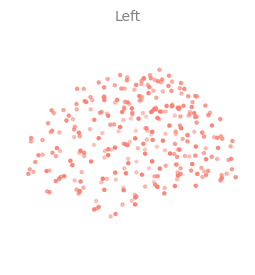

In [5]:
# Import packages
import netplotbrain
import pandas as pd
# Define the nodes
nodes = '/home/ROBARTS/mtaylor/graham/projects/ctb-akhanf-ab/cfmm-bids/Khan/LOBE/analysis/LOBE_analysis/resources/atlas/atlas-schaefer_dseg.tsv'
nodes_df = pd.read_table(nodes)
display(nodes_df)

#pd.DataFrame()
# Call netplotbrain to plot
netplotbrain.plot(nodes=nodes_df, arrowaxis=None)


In [7]:
import netplotbrain
import pandas as pd
import nibabel as nib
import numpy as np

In [ ]:
nodes_cifti='/home/ROBARTS/mtaylor/graham/projects/ctb-akhanf-ab/cfmm-bids/Khan/LOBE/analysis/LOBE_analysis/resources/atlas/atlas-schaefer_dseg.tsv'
parcels = nib.load(nodes_cifti).header.get_axis(1).name

In [17]:
#try plotting our data

nodes_cifti='/home/ROBARTS/mtaylor/graham/projects/ctb-akhanf-ab/cfmm-bids/Khan/LOBE/analysis/LOBE_analysis/resources/atlas/atlas-schaefer_coords.pscalar.nii'
struc_edges_cifti='/home/ROBARTS/mtaylor/graham/projects/ctb-akhanf-ab/cfmm-bids/Khan/LOBE/analysis/LOBE_analysis/results/LOBE/sub-007/dwi/sub-007_den-32k_atlas-schaefer_struc.pconn.nii'
func_edges_cifti='/home/ROBARTS/mtaylor/graham/projects/ctb-akhanf-ab/cfmm-bids/Khan/LOBE/analysis/LOBE_analysis/results/LOBE/sub-007/func/sub-007_task-rest_den-32k_desc-preproc_denoise-24HMP8PhysSpikeReg_fwhm-5_atlas-schaefer_bold.pconn.nii'
template='MNI152NLin6Asym' #closest to fsLR surfs

parcels = nib.load(nodes_cifti).header.get_axis(1).name

nodes = nib.load(nodes_cifti).get_fdata()
func_edges = nib.load(func_edges_cifti).get_fdata()
struc_edges = nib.load(struc_edges_cifti).get_fdata()

func_degree=np.abs(func_edges).sum(axis=0)

#create dataframe for nodes, node coloring
nodes_df = pd.DataFrame({'x':nodes[0,:],'y':nodes[1,:],'z':nodes[2,:],'network':labels,'degree':func_degree})

In [12]:
import re

pattern=r'[^_]+_[^_]+_([^_]+)'
        
    
labels = [re.search(pattern,parcel)[1] for parcel in parcels]

idx_to_labels = {idx:re.search(pattern,parcel)[1] for idx,parcel in enumerate(parcels)}

(<Figure size 900x400 with 5 Axes>,
 [<Axes3D: title={'center': 'Left'}>,
  <Axes3D: title={'center': 'Superior'}>,
  <Axes: >,
  <Axes: >,
  <Axes: >])

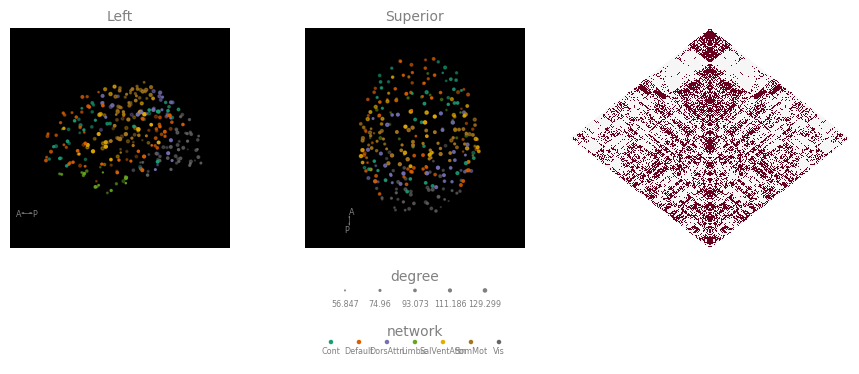

In [16]:
netplotbrain.plot(nodes=nodes_df,
                  edges=struc_edges,
                  template=template,
                  node_color='network',
                  node_size='degree',
                  node_sizevminvmax='minmax',
                  view='LSc', # 'Sc' - superior, connectivity
                  #view='LSs', # Left Superior spring
                  edge_thresholddirection='above',
                  edge_threshold=0.9,
                  edge_widthscale=0.3)

In [15]:
# try out nichord here

from nichord.chord import plot_chord
from nichord.convert import convert_matrix

chord_edges,chord_edge_weights = convert_matrix(edges)
plot_chord(idx_to_label=idx_to_labels,edges=chord_edges,
           edge_weights=chord_edge_weights,
           fp_chord='plot_chord.png')

NameError: name 'edges' is not defined

In [19]:
# Define the input and output file paths
input_file_path = '../NBS/DesignMatrix.txt'
output_file_path = '../NBS/DesignMatrixWithCovariates.txt'

# Open the input file in read mode and the output file in write mode
with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
    # Iterate through each line in the input file
    for line in infile:
        # Strip any leading/trailing whitespace and add the additional text
        new_line = line.strip() + ' 0 0\n'
        # Write the modified line to the output file
        outfile.write(new_line)

print(f"Updated file has been saved to {output_file_path}")

Updated file has been saved to ../NBS/DesignMatrixWithCovariates.txt


In [18]:
pwd

'/home/ROBARTS/mtaylor/graham/projects/ctb-akhanf-ab/cfmm-bids/Khan/LOBE/analysis/LOBE_analysis/notebooks'

## SFC from NBS ##

In [2]:
import pandas as pd
import nibabel as nib
from glob import glob
import numpy as np
import statsmodels.api as sp
#imported the full paths since it wasn't working otherwise - not sure why 
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read in data
df_tabular = pd.read_csv('../resources/merged_tabular_withconn.tsv',sep='\t')

In [4]:
#just get LOBE dataset 
df_LOBE = df_tabular[df_tabular["dataset"] == "LOBE"]

#just get HCP dataset
df_HCP = df_tabular[df_tabular["dataset"] == "HCP"]

In [5]:
df_LOBE

participant_id dataset   age  sex  age_seizure_onset  age_ep_diagnosis  \
341        sub-004    LOBE   NaN  NaN                NaN               NaN   
342        sub-006    LOBE   9.0    M                7.0               8.0   
343        sub-007    LOBE   9.0    F                7.0               7.0   
344        sub-009    LOBE   8.0    M                2.0               8.0   
345        sub-010    LOBE  15.0    M                7.0               7.0   
346        sub-012    LOBE  14.0    F                4.0              10.0   
347        sub-013    LOBE  15.0    F               13.0              14.0   
348        sub-014    LOBE  14.0    M                9.0               9.0   
349        sub-015    LOBE  10.0    M                7.0               7.0   
350        sub-017    LOBE  15.0    F               10.0              10.0   
351        sub-019    LOBE  17.0    F               16.0              16.0   
352        sub-020    LOBE  15.0    F                8.0              10.0   
353        sub-021    LOBE  18.0    F                NaN               NaN   
354        sub-022    LOBE  11.0    F                3.0               5.0   
355        sub-024    LOBE  11.0    M                8.0               9.0   
356        sub-025    LOBE  18.0    F                8.0              17.0   
357        sub-026    LOBE  16.0    M                2.0              12.0   
358        sub-027    LOBE   7.0    M                4.0               5.0   
359        sub-029    LOBE  16.0    M               15.0              15.0   
360        sub-031    LOBE   9.0    M                4.0               6.0   
361        sub-033    LOBE   7.0    M                4.0               NaN   
362        sub-035    LOBE   7.0    M                2.0               4.0   
363        sub-038    LOBE  10.0    F                7.0               7.0   

     ep_duration_first_scan  seizure_duration_first_scan  pnes  \
341                     NaN                          NaN   NaN   
342                     1.0                          2.0   0.0   
343                     2.0                          2.0   0.0   
344                     0.0                          6.0   0.0   
345                     8.0                          8.0   0.0   
346                     4.0                         10.0   0.0   
347                     1.0                          2.0   0.0   
348                     5.0                          5.0   0.0   
349                     3.0                          3.0   0.0   
350                     5.0                          5.0   0.0   
351                     1.0                          1.0   0.0   
352                     5.0                          7.0   0.0   
353                     NaN                          NaN   NaN   
354                     6.0                          8.0   0.0   
355                     2.0                          3.0   0.0   
356                     1.0                         10.0   0.0   
357                     4.0                         14.0   0.0   
358                     3.0                          3.0   0.0   
359                     1.0                          1.0   0.0   
360                     3.0                          5.0   0.0   
361                     NaN                          3.0   0.0   
362                     3.0                          5.0   0.0   
363                     3.0                          3.0   0.0   

     benign_rolandic  ... NFC_Limbic  NFC_Cont  NFC_Default   NSC_Vis  \
341              NaN  ...   0.018775  0.041168     0.005356  4.579539   
342              0.0  ...   0.242738  0.337645     0.289935  4.145457   
343              0.0  ...   0.040016  0.055915     0.013688  4.204648   
344              0.0  ...   0.149506  0.225325     0.161981  4.746400   
345              0.0  ...   0.090205  0.100796     0.137763  4.871239   
346              0.0  ...   0.100053  0.078775     0.079218  4.415125   
347              0.0  ...   0.09857

In [35]:
#get left and right groups
left = df_LOBE[df_LOBE["lat_final_left"] == 1]
notleft = df_LOBE[df_LOBE["lat_final_left"] == 0]
right = df_LOBE[df_LOBE["lat_final_right"] == 1]
notright = df_LOBE[df_LOBE["lat_final_right"] == 0]

# exlcuding bilateral
left_nobilat = df_LOBE[(df_LOBE["lat_final_left"] == 1) & (df_LOBE["lat_final_bilateral"] == 0)]
right_nobilat = df_LOBE[(df_LOBE["lat_final_right"] == 1) & (df_LOBE["lat_final_bilateral"] == 0)]


In [36]:
print(right_nobilat["participant_id"])

342    sub-006
345    sub-010
348    sub-014
350    sub-017
352    sub-020
356    sub-025
359    sub-029
362    sub-035
363    sub-038
Name: participant_id, dtype: object


In [37]:
print(left_nobilat["participant_id"])

344    sub-009
346    sub-012
347    sub-013
349    sub-015
351    sub-019
354    sub-022
358    sub-027
360    sub-031
Name: participant_id, dtype: object


In [77]:
x1 = left_nobilat["RFC_7Networks_LH_Default_Temp_6"]
x2 = right_nobilat["RFC_7Networks_LH_Default_Temp_6"]

In [78]:
tstats,pvals,dfs = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
pvals

0.4055591529137964

In [71]:
#get temporal and nontemporal groups
temporal = df_LOBE[df_LOBE["loc_final_temporal"] == 1]
nontemporal = df_LOBE[df_LOBE["loc_final_temporal"] == 0]

In [81]:
x1 = temporal["RFC_7Networks_LH_Default_Temp_6"]
x2 = nontemporal["RFC_7Networks_LH_Default_Temp_6"]

In [82]:
tstats,pvals,dfs = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
pvals

0.047048063210973996

In [85]:
#get temporal and nontemporal groups
frontal = df_LOBE[df_LOBE["loc_final_frontal"] == 1]
nonfrontal = df_LOBE[df_LOBE["loc_final_frontal"] == 0]


In [102]:
x1 = frontal["RSC_7Networks_LH_Cont_Temp_1"]
x2 = nonfrontal["RSC_7Networks_LH_Cont_Temp_1"]

In [103]:
tstats,pvals,dfs = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
pvals

0.002581414277858392

## Network ##

In [150]:
x1 = frontal["NSC_Cont"]
x2 = nonfrontal["NSC_Cont"]

In [151]:
tstats,pvals,dfs = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
pvals

0.09437163429154052

In [ ]:
rejected,corr_pvals = fdrcorrection(pvals, alpha=0.05, method='indep', is_sorted=False)
rejected

## Correlations ##

Processing: RSC_7Networks_LH_Cont_Temp_1 with age


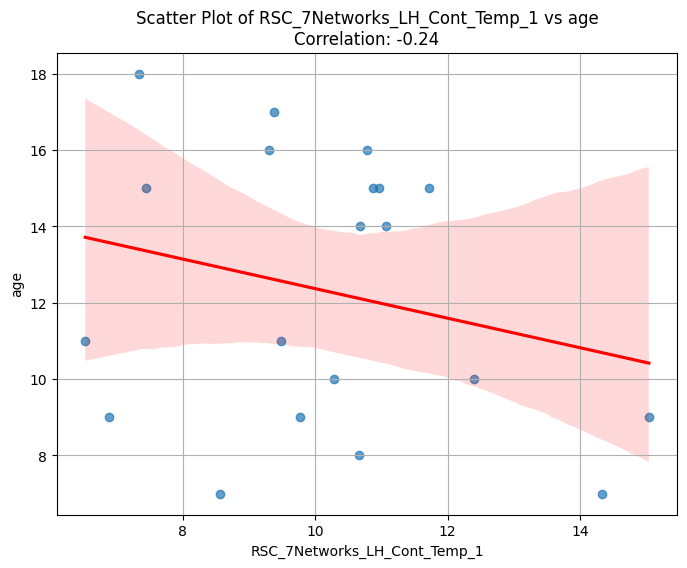

Processing: RSC_7Networks_LH_Cont_Temp_1 with age_seizure_onset


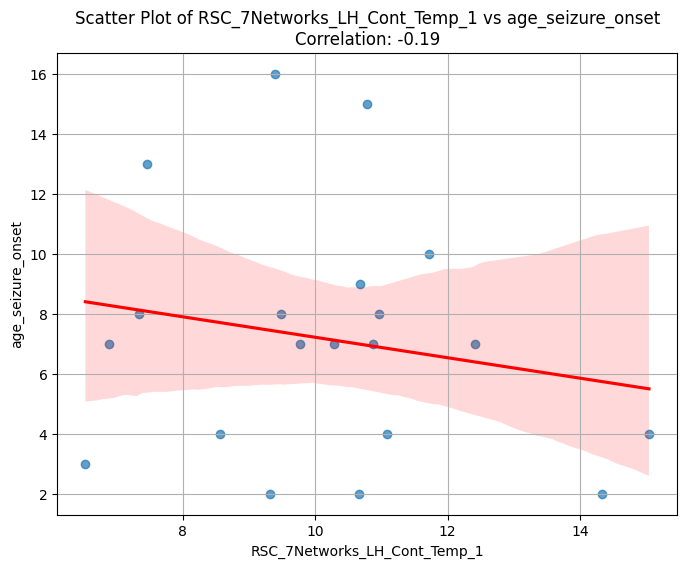

Processing: RSC_7Networks_LH_Cont_Temp_1 with age_ep_diagnosis


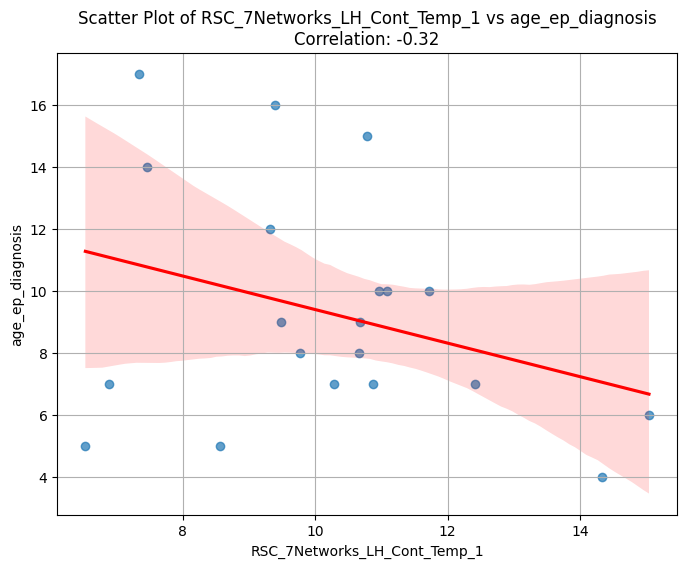

Processing: RSC_7Networks_LH_Cont_Temp_1 with ep_duration_first_scan


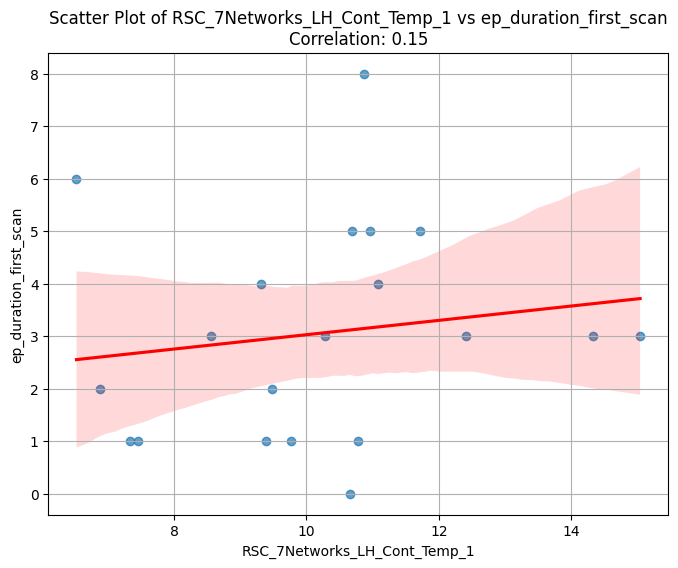

Processing: RSC_7Networks_LH_Cont_Temp_1 with seizure_duration_first_scan


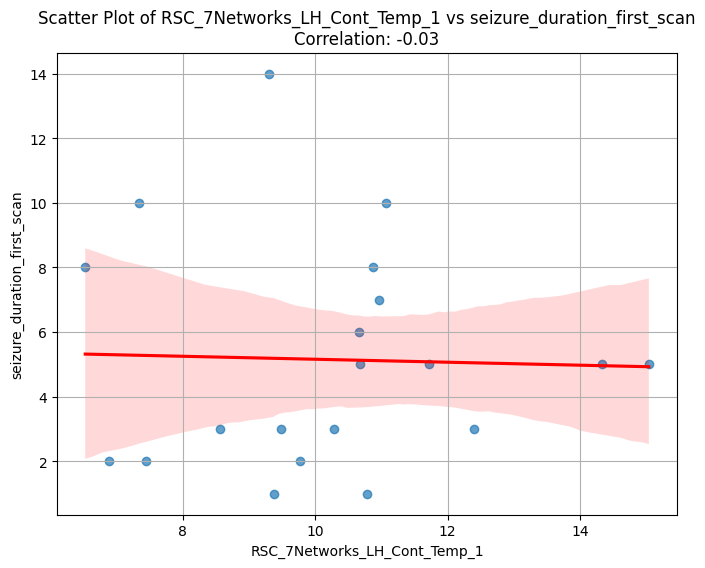

Processing: RSC_7Networks_LH_Cont_Temp_1 with asm_first_scan


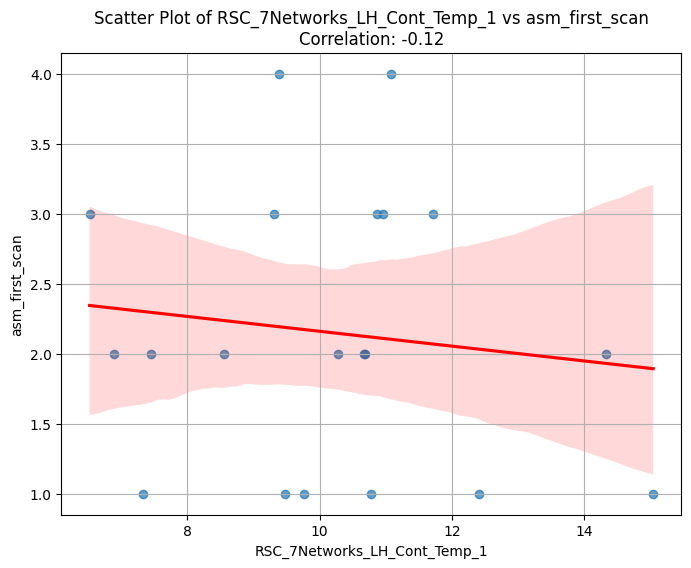

Processing: RSFC_7Networks_LH_Cont_Temp_1 with age


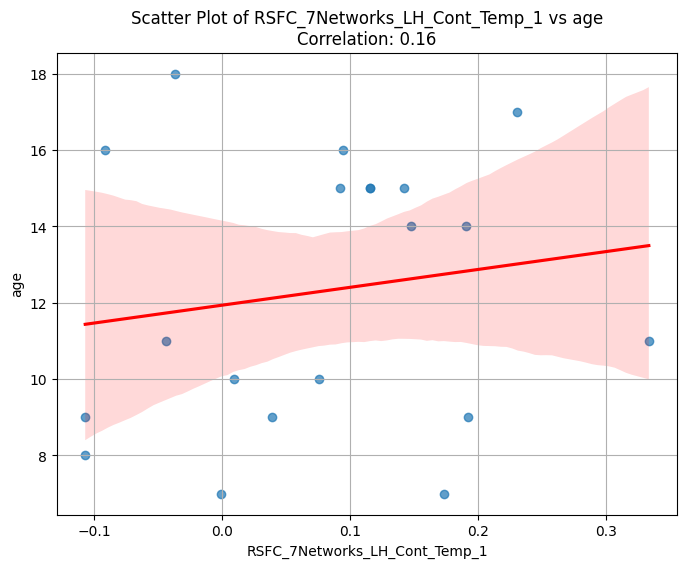

Processing: RSFC_7Networks_LH_Cont_Temp_1 with age_seizure_onset


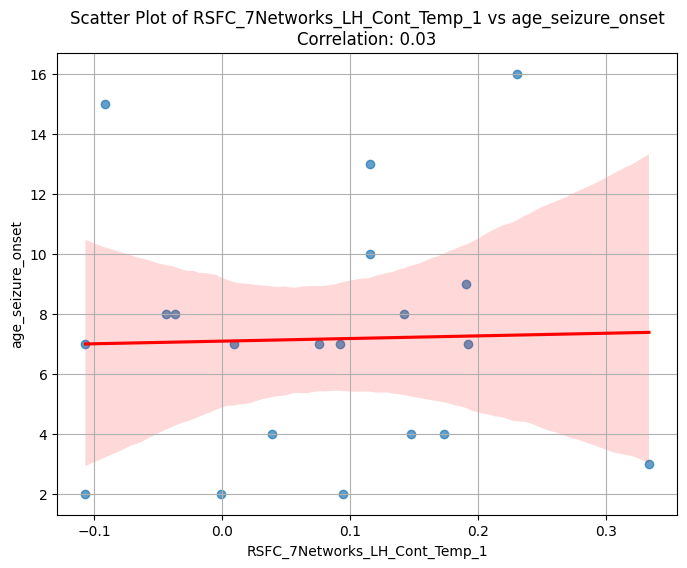

Processing: RSFC_7Networks_LH_Cont_Temp_1 with age_ep_diagnosis


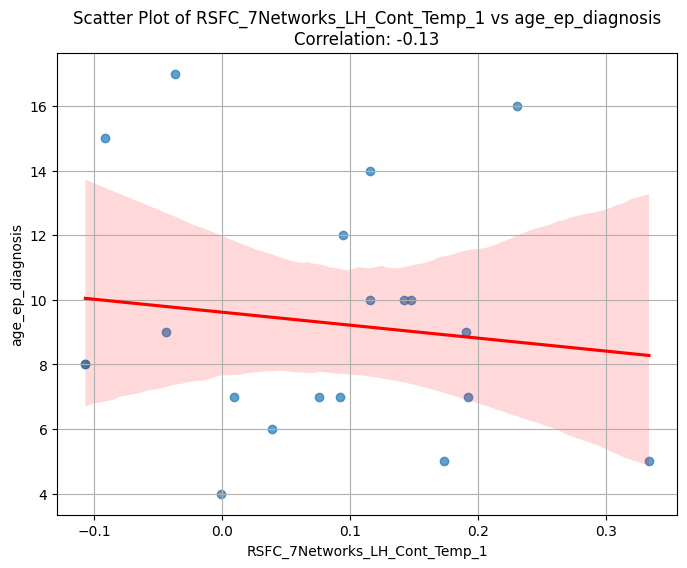

Processing: RSFC_7Networks_LH_Cont_Temp_1 with ep_duration_first_scan


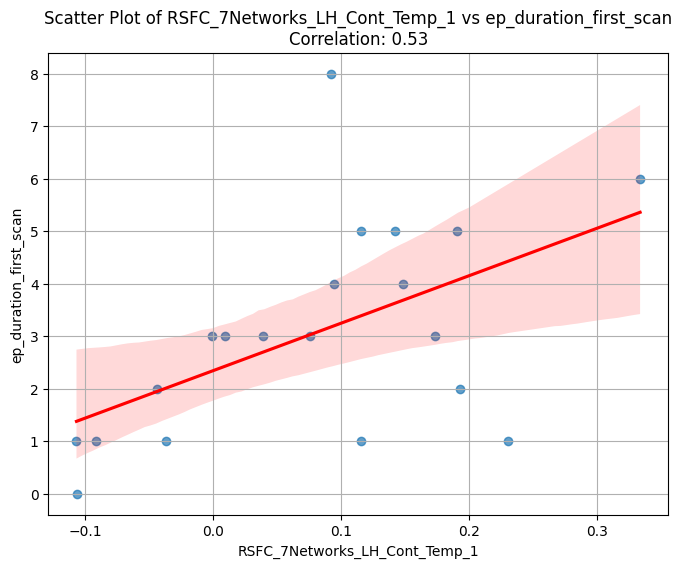

Processing: RSFC_7Networks_LH_Cont_Temp_1 with seizure_duration_first_scan


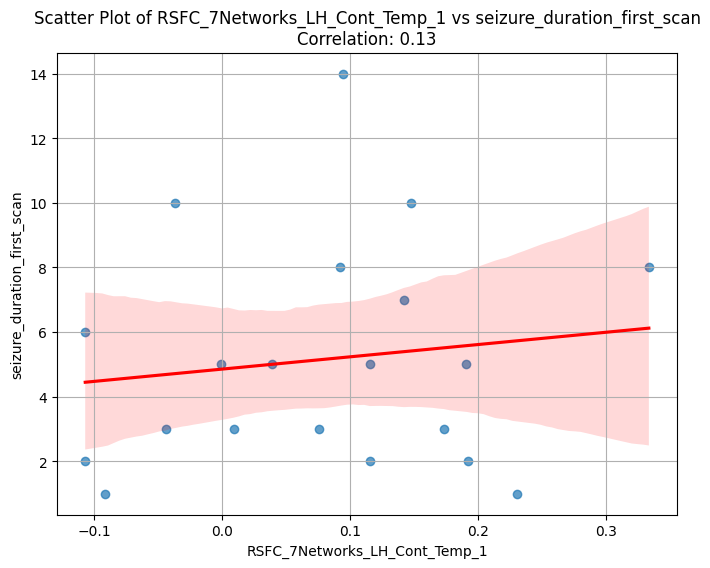

Processing: RSFC_7Networks_LH_Cont_Temp_1 with asm_first_scan


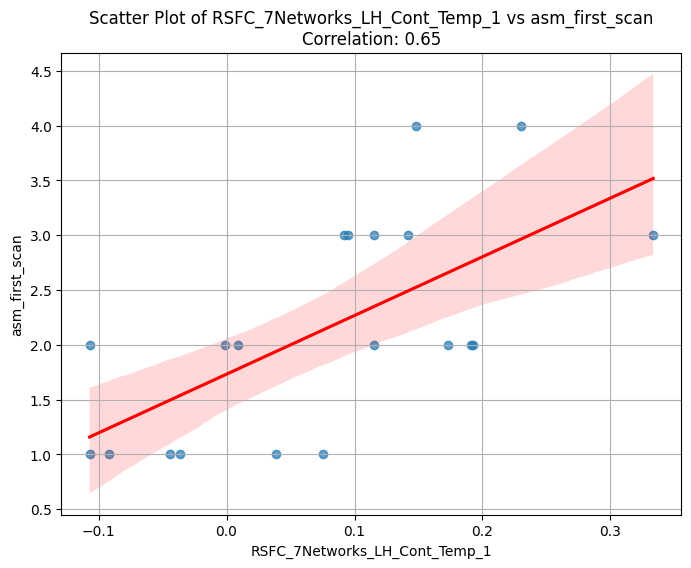

Processing: RFC_7Networks_LH_Cont_Temp_1 with age


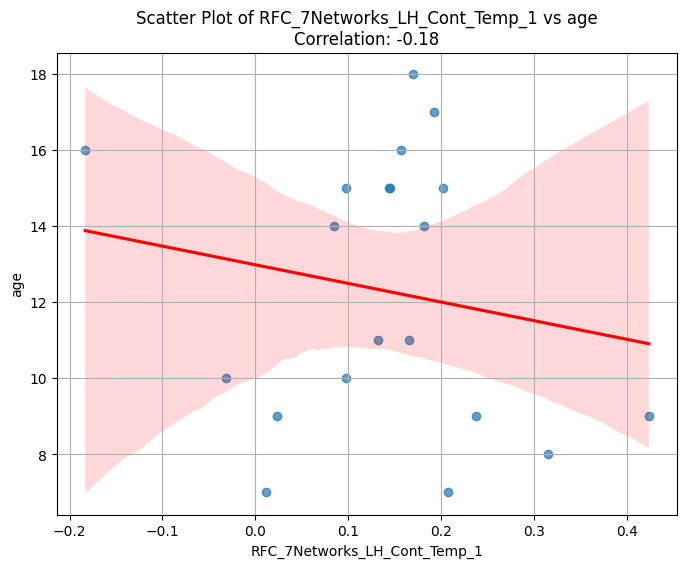

Processing: RFC_7Networks_LH_Cont_Temp_1 with age_seizure_onset


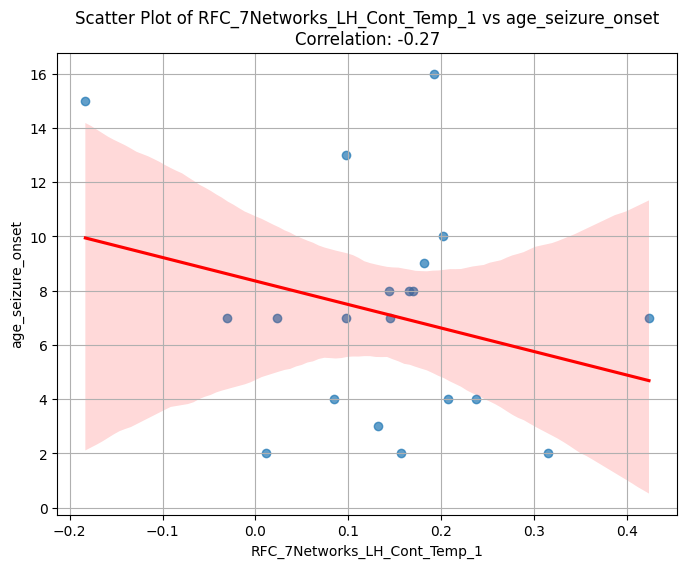

Processing: RFC_7Networks_LH_Cont_Temp_1 with age_ep_diagnosis


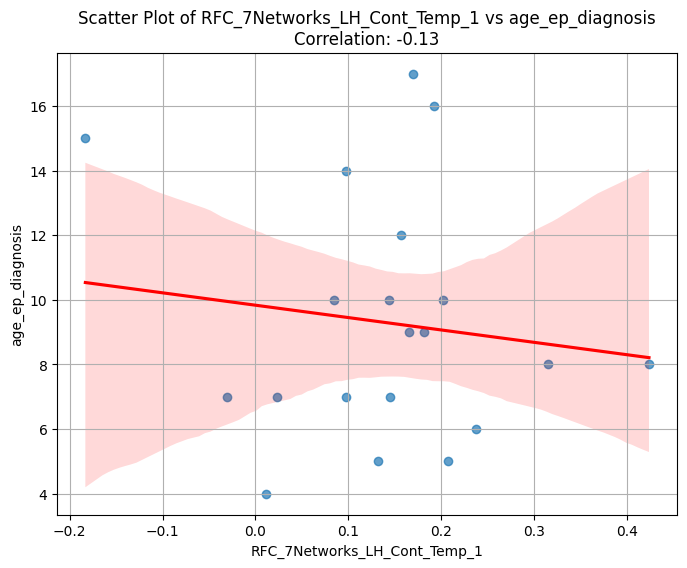

Processing: RFC_7Networks_LH_Cont_Temp_1 with ep_duration_first_scan


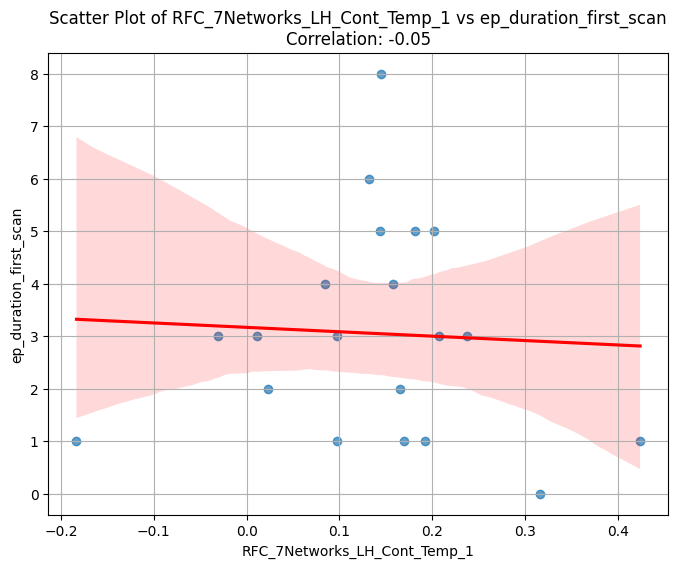

Processing: RFC_7Networks_LH_Cont_Temp_1 with seizure_duration_first_scan


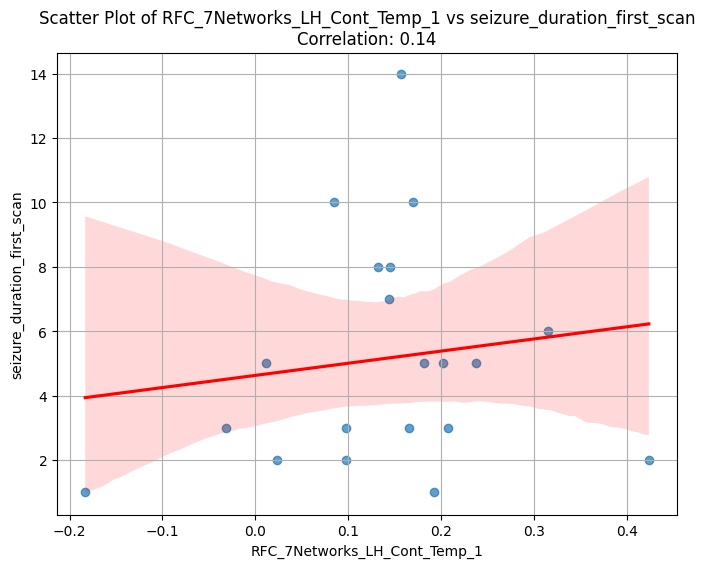

Processing: RFC_7Networks_LH_Cont_Temp_1 with asm_first_scan


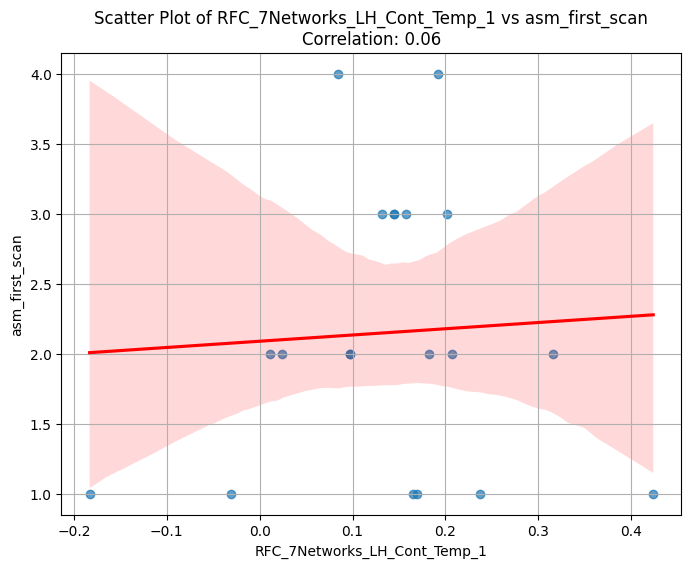

In [175]:
# Specify the list of target columns and the list of other columns
target_columns = ["RSC_7Networks_LH_Cont_Temp_1", "RSFC_7Networks_LH_Cont_Temp_1", "RFC_7Networks_LH_Cont_Temp_1"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan']

# Drop rows with NaN values in the target and other columns
df_clean = df_LOBE[[*target_columns, *other_columns]].dropna()

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    if pd.api.types.is_numeric_dtype(df_clean[target_col]) and pd.api.types.is_numeric_dtype(df_clean[other_col]):
        plt.figure(figsize=(8, 6))
        
        # Create a scatter plot with a regression line
        sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate the correlation coefficient
        try:
            corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
            corr_text = f'Correlation: {corr:.2f}'
        except ValueError:
            corr_text = 'Correlation: Not computable'
        
        # Add title and labels
        plt.title(f'Scatter Plot of {target_col} vs {other_col}\n{corr_text}')
        plt.xlabel(target_col)
        plt.ylabel(other_col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping {target_col} vs {other_col} due to non-numeric data.")

# Iterate over each target column
for target_column in target_columns:
    if target_column in df_clean.columns:
        # Compute correlations and plot for each target column with all other columns
        for col in other_columns:
            if col in df_clean.columns:
                print(f"Processing: {target_column} with {col}")
                plot_scatter_with_regression(target_column, col)

Processing: RSC_7Networks_LH_Default_Temp_2 with age


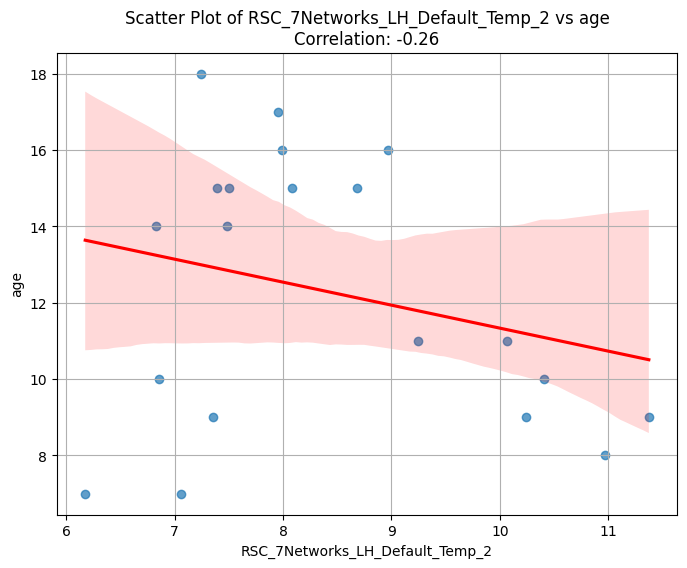

Processing: RSC_7Networks_LH_Default_Temp_2 with age_seizure_onset


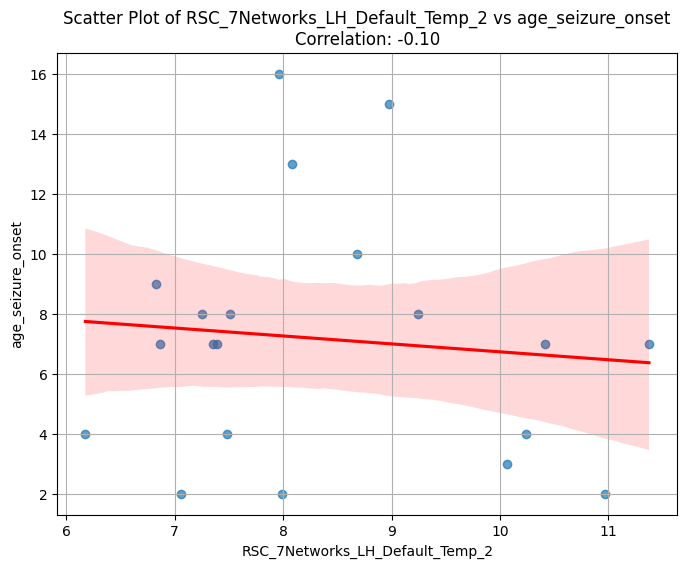

Processing: RSC_7Networks_LH_Default_Temp_2 with age_ep_diagnosis


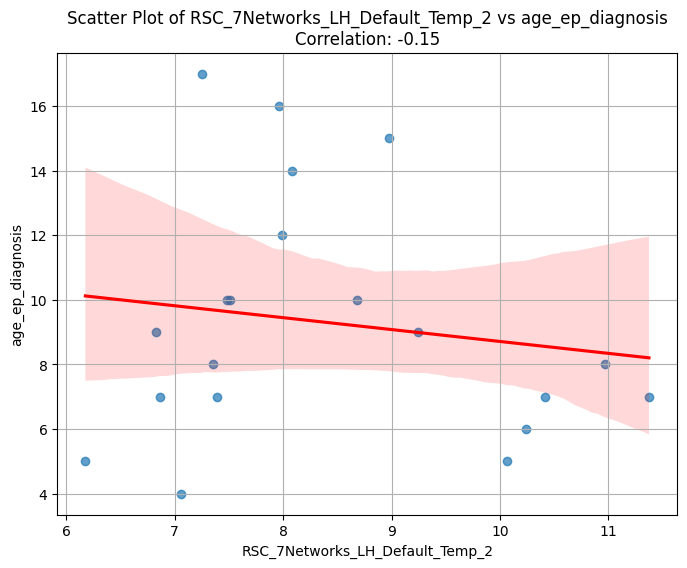

Processing: RSC_7Networks_LH_Default_Temp_2 with ep_duration_first_scan


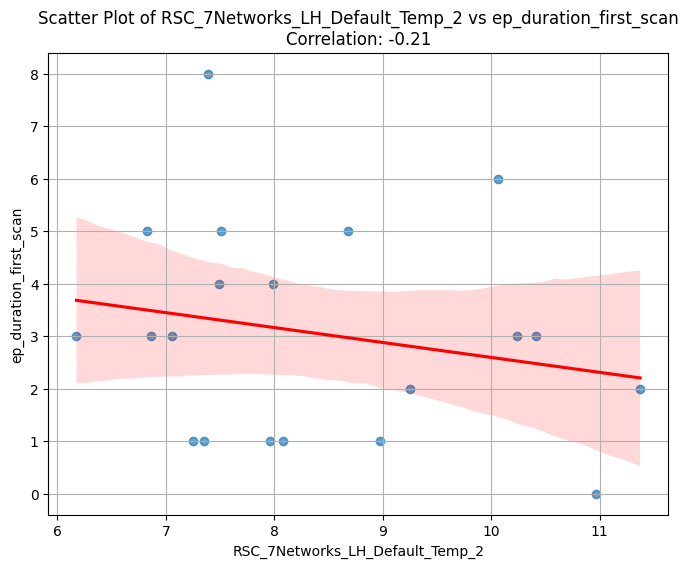

Processing: RSC_7Networks_LH_Default_Temp_2 with seizure_duration_first_scan


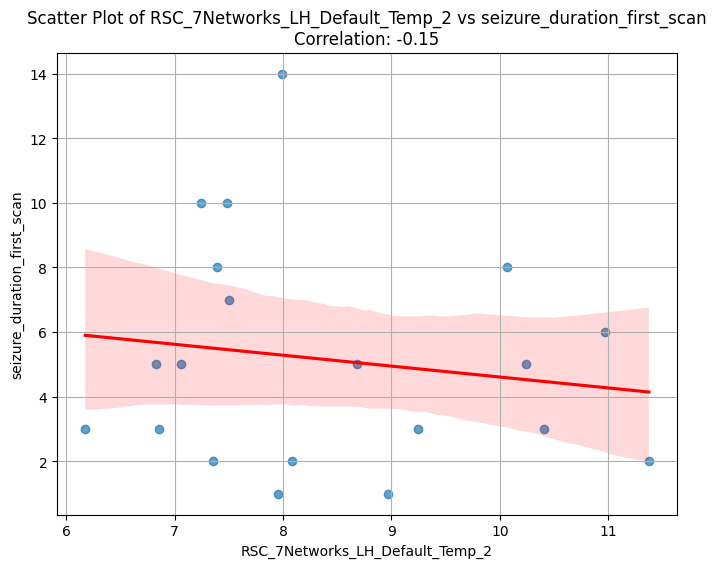

Processing: RSC_7Networks_LH_Default_Temp_2 with asm_first_scan


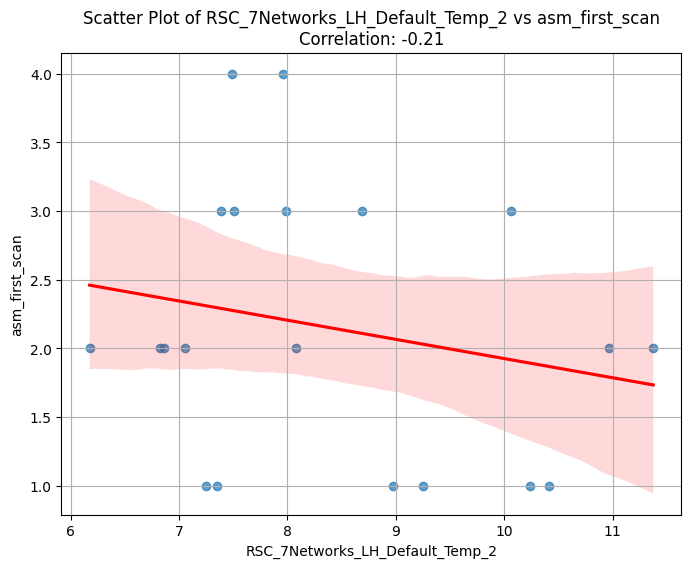

Processing: RSFC_7Networks_LH_Default_Temp_2 with age


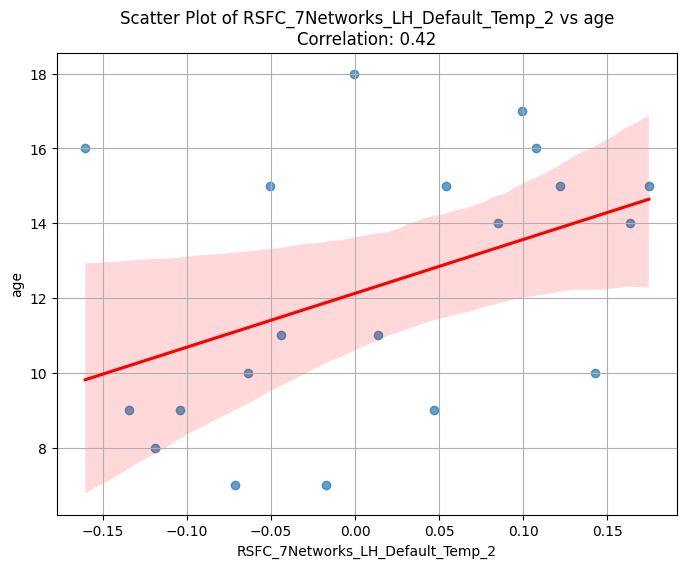

Processing: RSFC_7Networks_LH_Default_Temp_2 with age_seizure_onset


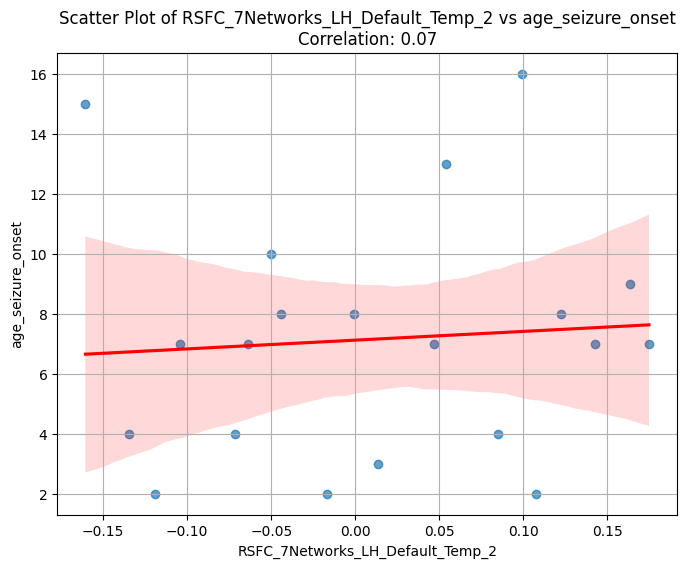

Processing: RSFC_7Networks_LH_Default_Temp_2 with age_ep_diagnosis


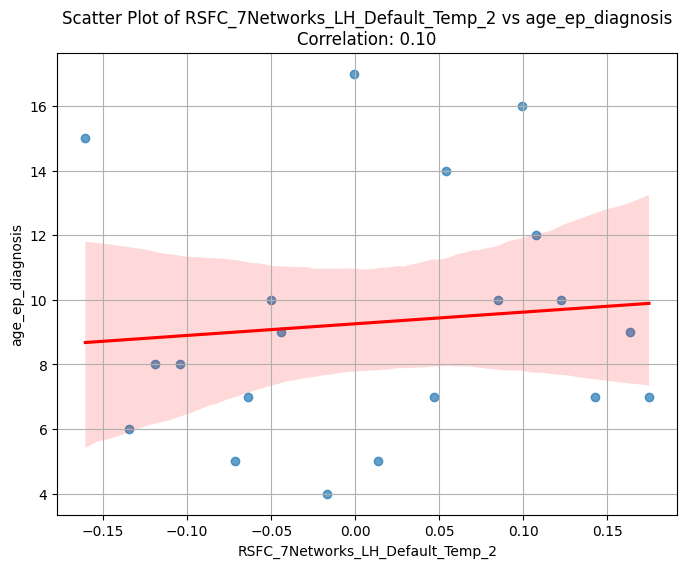

Processing: RSFC_7Networks_LH_Default_Temp_2 with ep_duration_first_scan


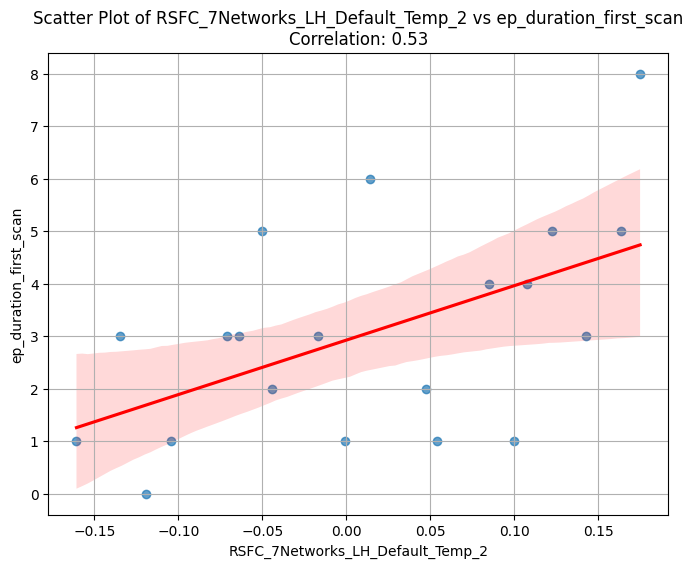

Processing: RSFC_7Networks_LH_Default_Temp_2 with seizure_duration_first_scan


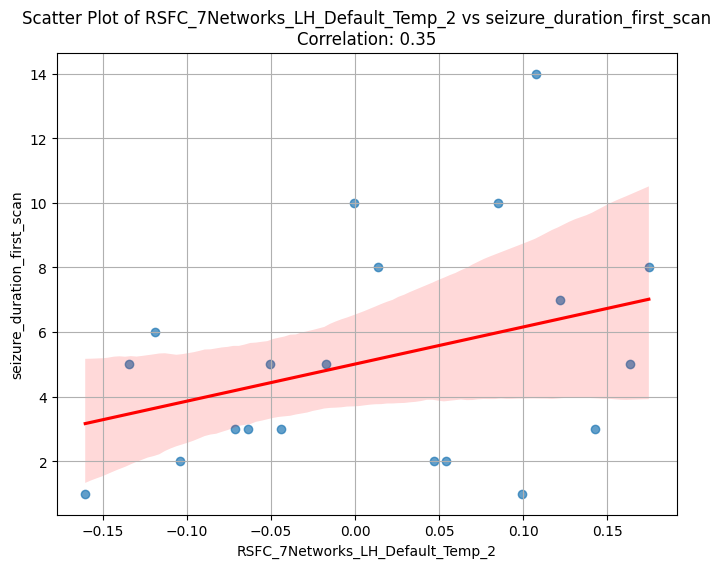

Processing: RSFC_7Networks_LH_Default_Temp_2 with asm_first_scan


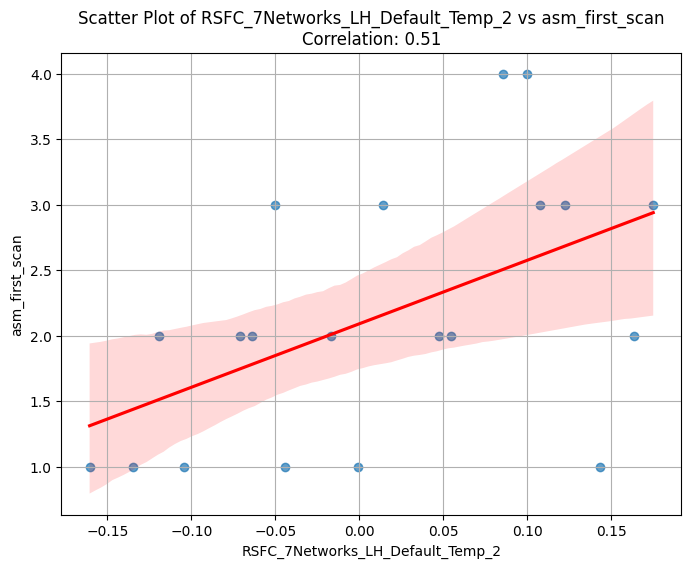

Processing: RFC_7Networks_LH_Default_Temp_2 with age


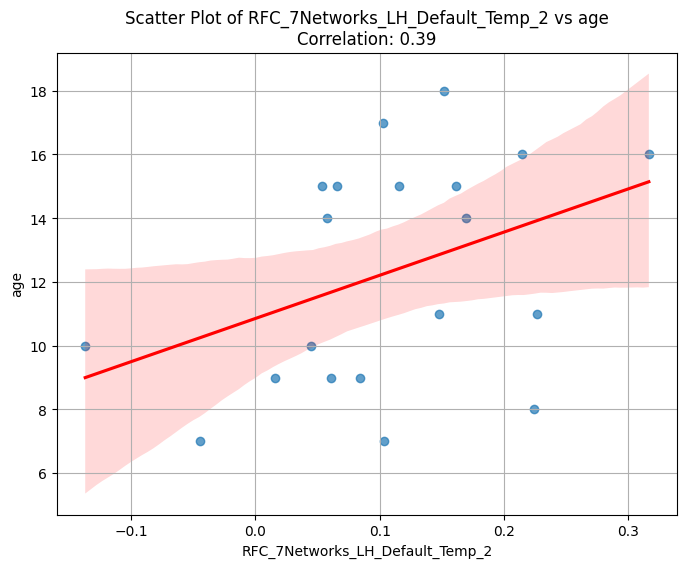

Processing: RFC_7Networks_LH_Default_Temp_2 with age_seizure_onset


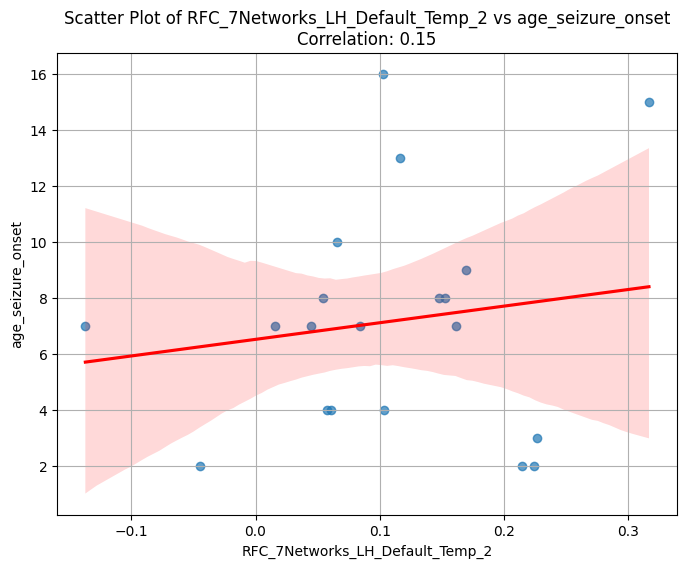

Processing: RFC_7Networks_LH_Default_Temp_2 with age_ep_diagnosis


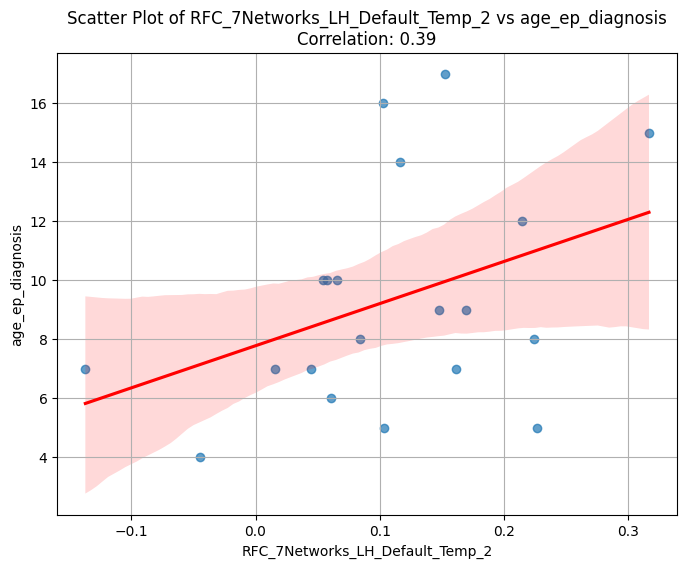

Processing: RFC_7Networks_LH_Default_Temp_2 with ep_duration_first_scan


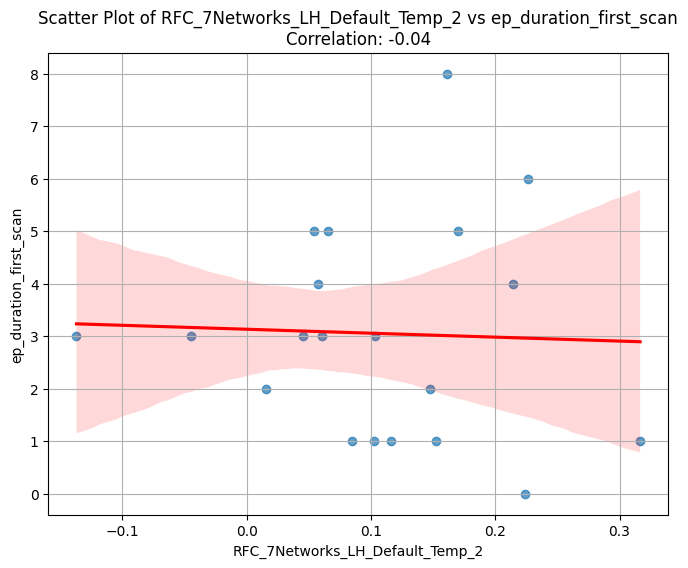

Processing: RFC_7Networks_LH_Default_Temp_2 with seizure_duration_first_scan


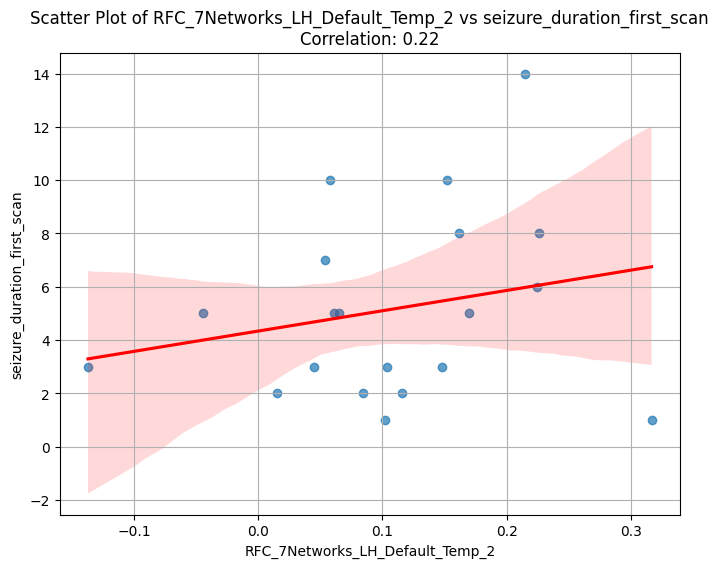

Processing: RFC_7Networks_LH_Default_Temp_2 with asm_first_scan


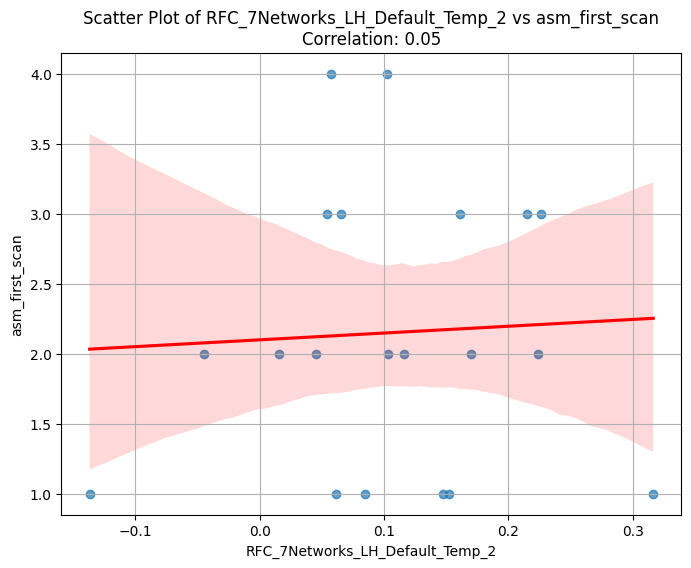

In [177]:
# Specify the list of target columns and the list of other columns
target_columns = ["RSC_7Networks_LH_Default_Temp_2", "RSFC_7Networks_LH_Default_Temp_2", "RFC_7Networks_LH_Default_Temp_2"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan']

# Drop rows with NaN values in the target and other columns
df_clean = df_LOBE[[*target_columns, *other_columns]].dropna()

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    if pd.api.types.is_numeric_dtype(df_clean[target_col]) and pd.api.types.is_numeric_dtype(df_clean[other_col]):
        plt.figure(figsize=(8, 6))
        
        # Create a scatter plot with a regression line
        sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate the correlation coefficient
        try:
            corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
            corr_text = f'Correlation: {corr:.2f}'
        except ValueError:
            corr_text = 'Correlation: Not computable'
        
        # Add title and labels
        plt.title(f'Scatter Plot of {target_col} vs {other_col}\n{corr_text}')
        plt.xlabel(target_col)
        plt.ylabel(other_col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping {target_col} vs {other_col} due to non-numeric data.")

# Iterate over each target column
for target_column in target_columns:
    if target_column in df_clean.columns:
        # Compute correlations and plot for each target column with all other columns
        for col in other_columns:
            if col in df_clean.columns:
                print(f"Processing: {target_column} with {col}")
                plot_scatter_with_regression(target_column, col)

Processing: RSC_7Networks_LH_Default_Temp_6 with age


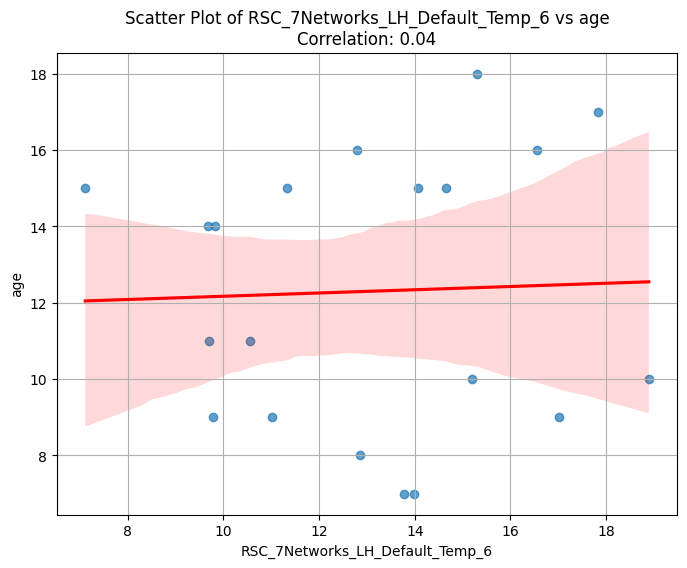

Processing: RSC_7Networks_LH_Default_Temp_6 with age_seizure_onset


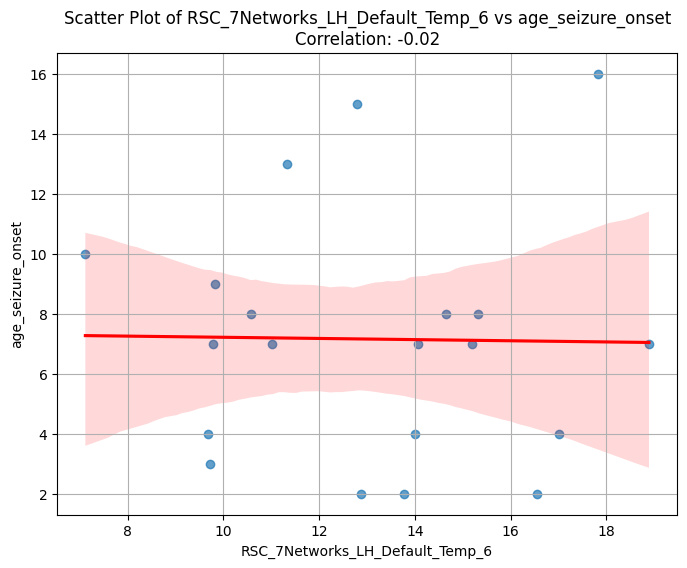

Processing: RSC_7Networks_LH_Default_Temp_6 with age_ep_diagnosis


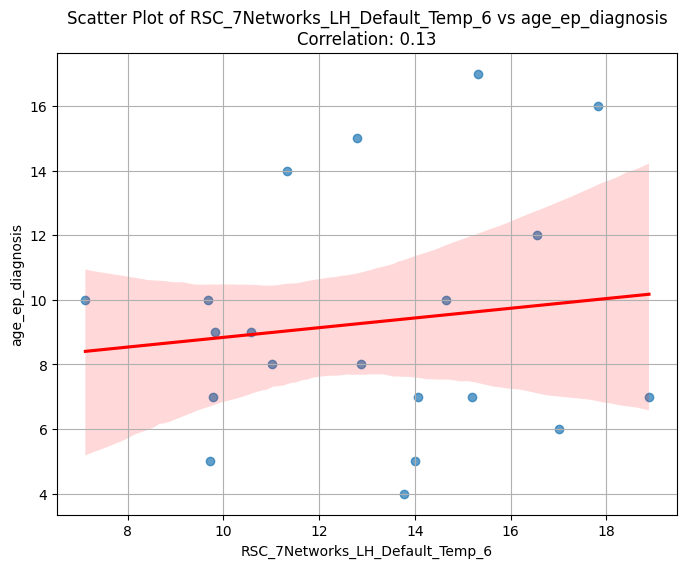

Processing: RSC_7Networks_LH_Default_Temp_6 with ep_duration_first_scan


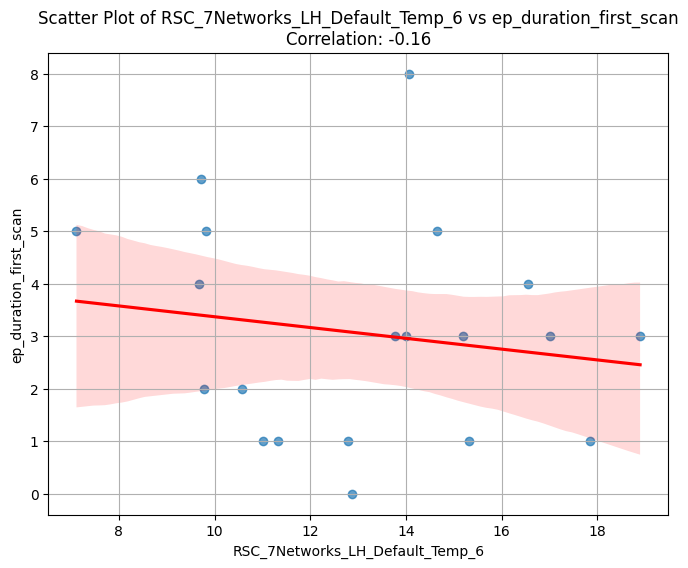

Processing: RSC_7Networks_LH_Default_Temp_6 with seizure_duration_first_scan


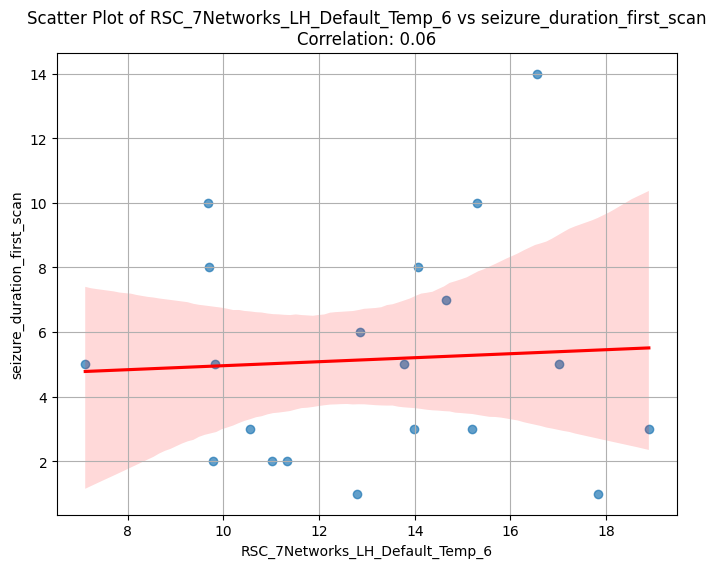

Processing: RSC_7Networks_LH_Default_Temp_6 with asm_first_scan


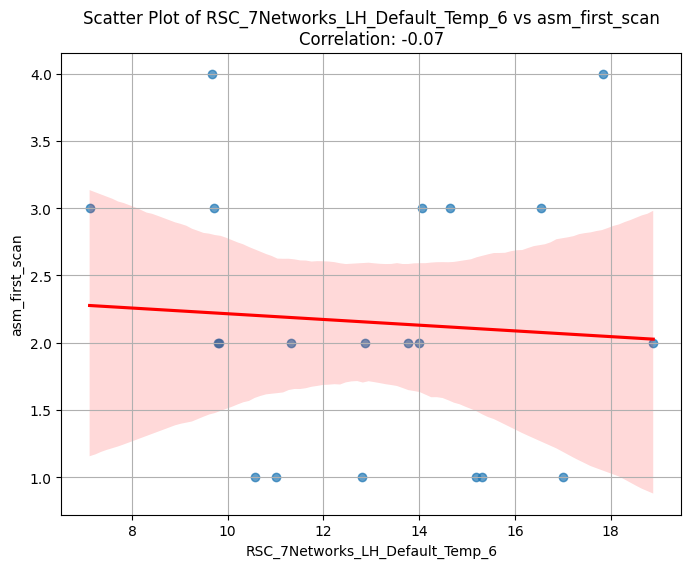

Processing: RSFC_7Networks_LH_Default_Temp_6 with age


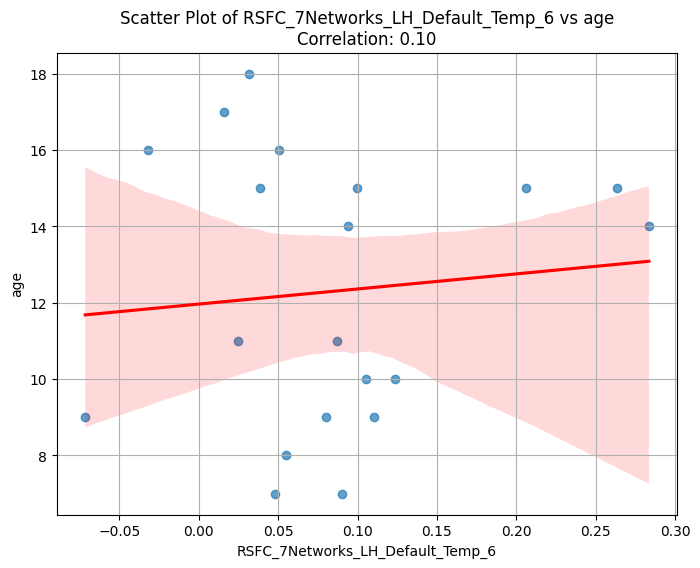

Processing: RSFC_7Networks_LH_Default_Temp_6 with age_seizure_onset


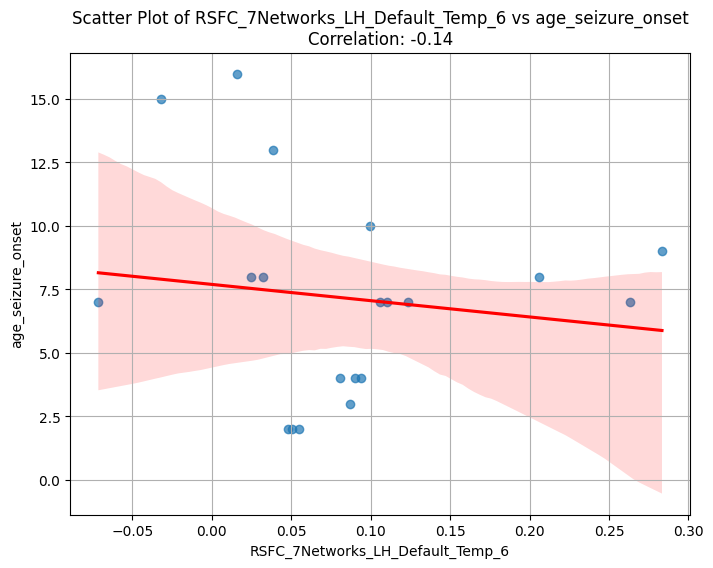

Processing: RSFC_7Networks_LH_Default_Temp_6 with age_ep_diagnosis


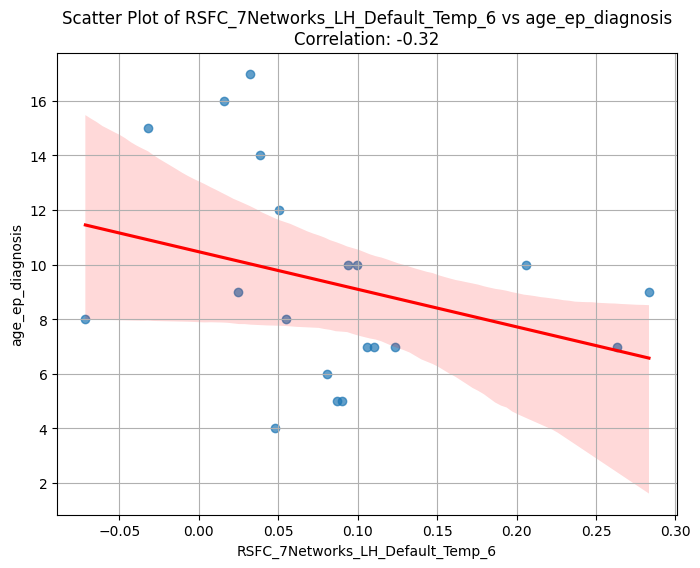

Processing: RSFC_7Networks_LH_Default_Temp_6 with ep_duration_first_scan


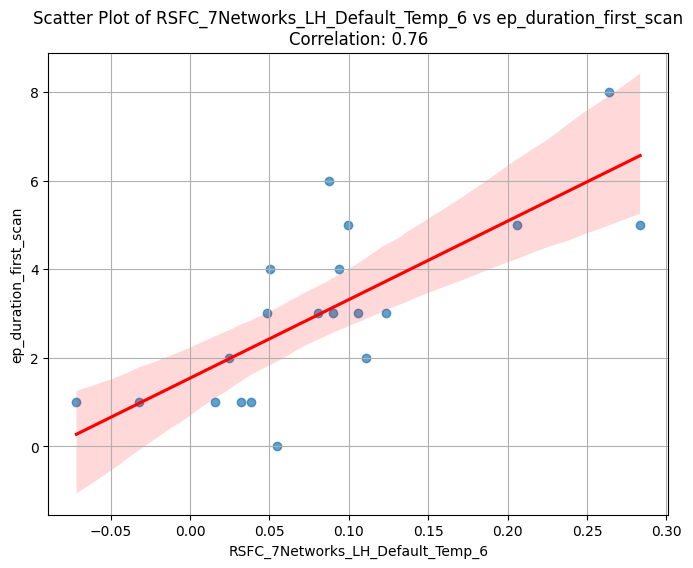

Processing: RSFC_7Networks_LH_Default_Temp_6 with seizure_duration_first_scan


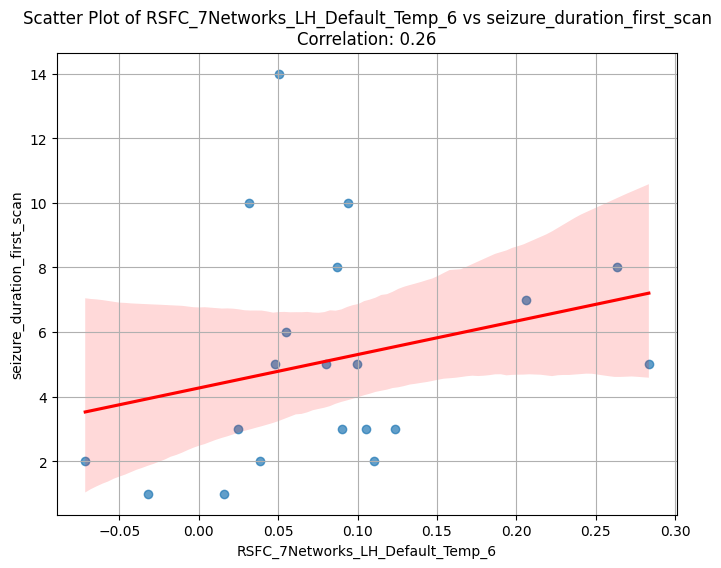

Processing: RSFC_7Networks_LH_Default_Temp_6 with asm_first_scan


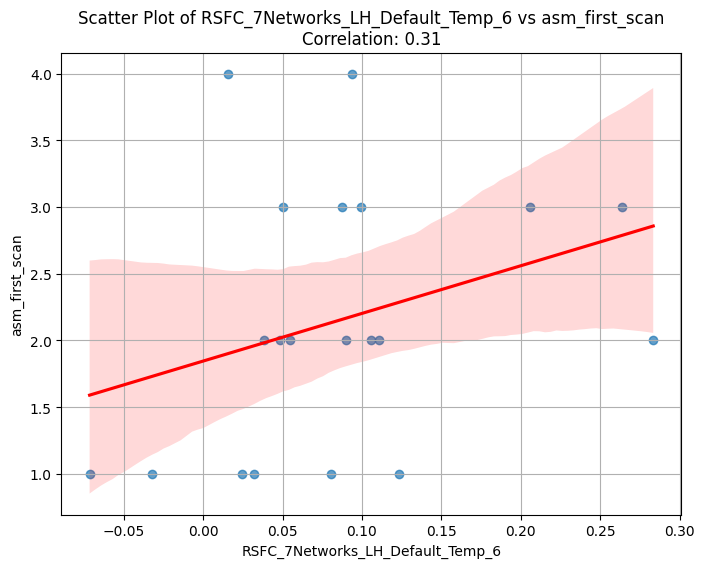

Processing: RFC_7Networks_LH_Default_Temp_6 with age


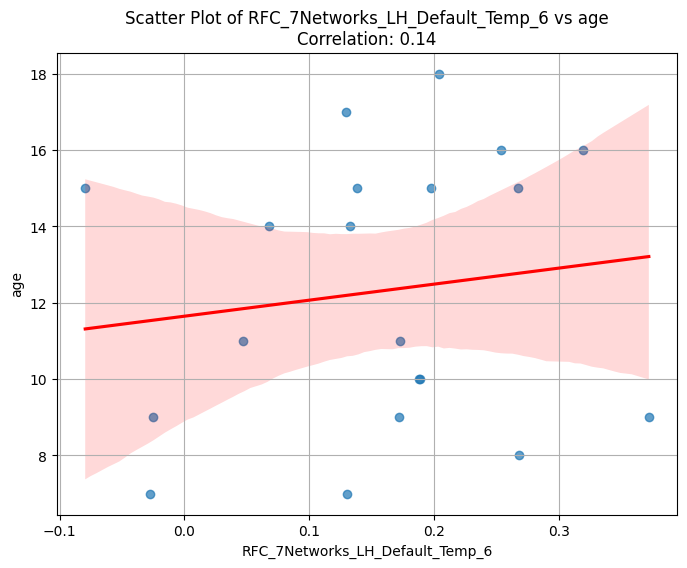

Processing: RFC_7Networks_LH_Default_Temp_6 with age_seizure_onset


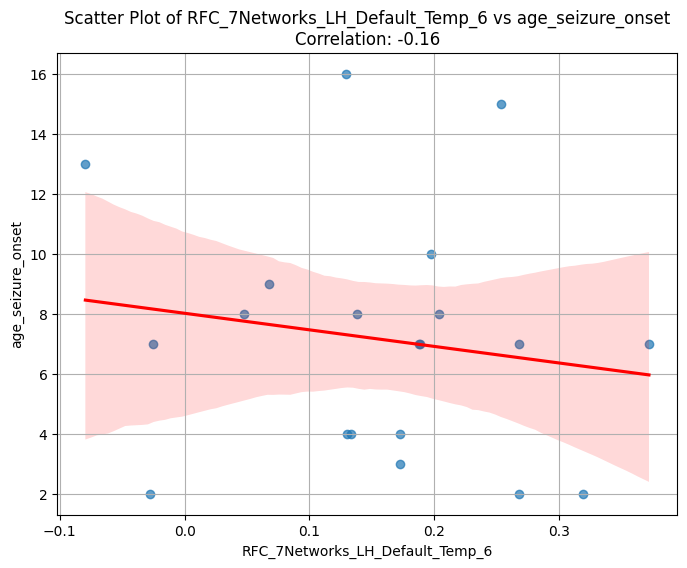

Processing: RFC_7Networks_LH_Default_Temp_6 with age_ep_diagnosis


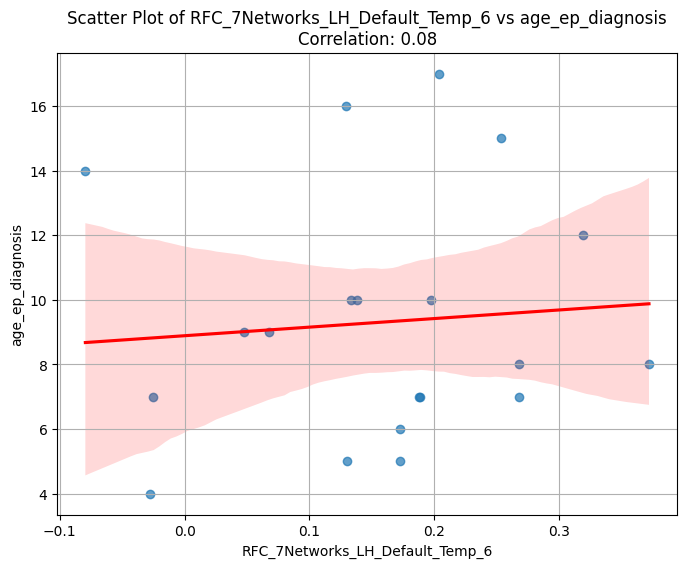

Processing: RFC_7Networks_LH_Default_Temp_6 with ep_duration_first_scan


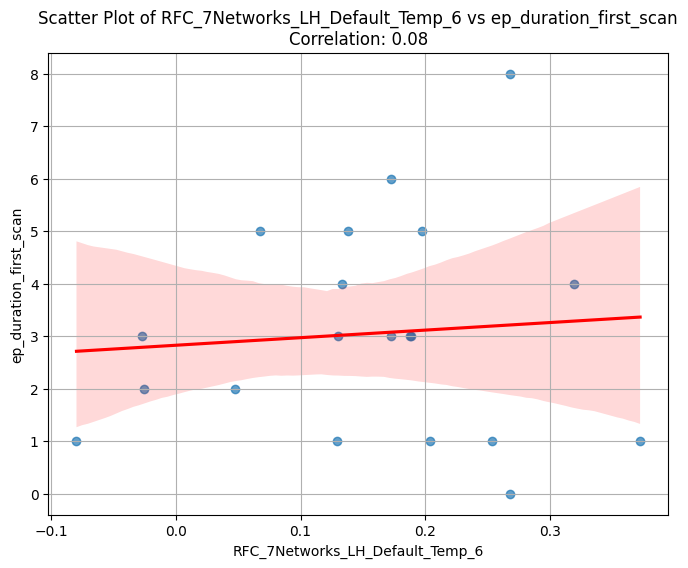

Processing: RFC_7Networks_LH_Default_Temp_6 with seizure_duration_first_scan


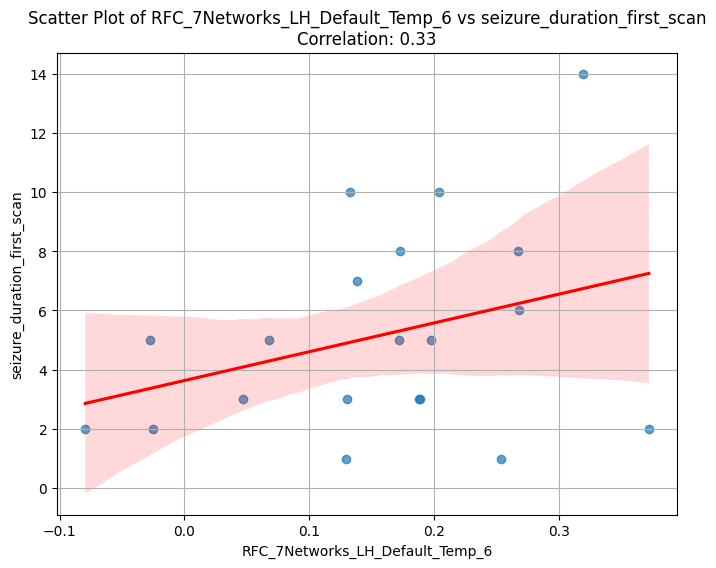

Processing: RFC_7Networks_LH_Default_Temp_6 with asm_first_scan


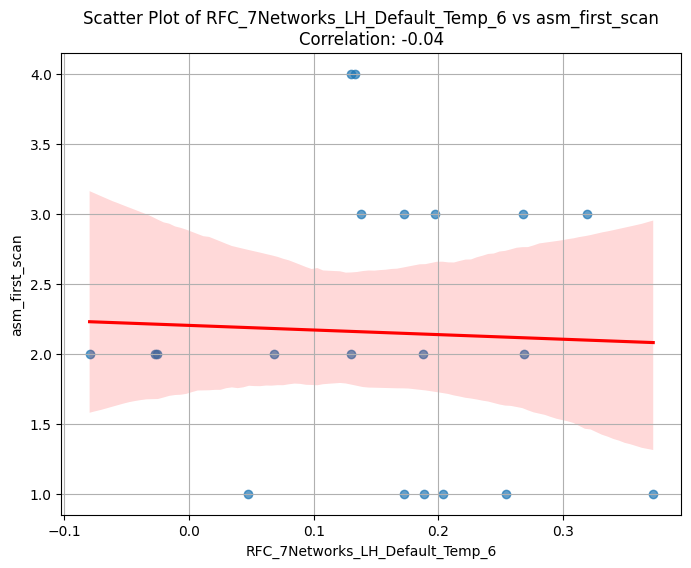

In [178]:
# Specify the list of target columns and the list of other columns
target_columns = ["RSC_7Networks_LH_Default_Temp_6", "RSFC_7Networks_LH_Default_Temp_6", "RFC_7Networks_LH_Default_Temp_6"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan']

# Drop rows with NaN values in the target and other columns
df_clean = df_LOBE[[*target_columns, *other_columns]].dropna()

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    if pd.api.types.is_numeric_dtype(df_clean[target_col]) and pd.api.types.is_numeric_dtype(df_clean[other_col]):
        plt.figure(figsize=(8, 6))
        
        # Create a scatter plot with a regression line
        sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate the correlation coefficient
        try:
            corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
            corr_text = f'Correlation: {corr:.2f}'
        except ValueError:
            corr_text = 'Correlation: Not computable'
        
        # Add title and labels
        plt.title(f'Scatter Plot of {target_col} vs {other_col}\n{corr_text}')
        plt.xlabel(target_col)
        plt.ylabel(other_col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping {target_col} vs {other_col} due to non-numeric data.")

# Iterate over each target column
for target_column in target_columns:
    if target_column in df_clean.columns:
        # Compute correlations and plot for each target column with all other columns
        for col in other_columns:
            if col in df_clean.columns:
                print(f"Processing: {target_column} with {col}")
                plot_scatter_with_regression(target_column, col)

In [182]:
# average over three nodes
# Specify the columns to average
columns_to_average = ["RSFC_7Networks_LH_Default_Temp_6", "RSFC_7Networks_LH_Default_Temp_2", "RSFC_7Networks_LH_Cont_Temp_1"]

# Ensure that all specified columns exist in the DataFrame
for col in columns_to_average:
    if col not in df_LOBE.columns:
        raise ValueError(f"Column {col} is not in the DataFrame")

# Calculate the average of the specified columns for each row
df_LOBE['Average_RSFC'] = df_LOBE[columns_to_average].mean(axis=1)

# Display the DataFrame with the new column
print(df_LOBE)

    participant_id dataset   age  sex  age_seizure_onset  age_ep_diagnosis  \
341        sub-004    LOBE   NaN  NaN                NaN               NaN   
342        sub-006    LOBE   9.0    M                7.0               8.0   
343        sub-007    LOBE   9.0    F                7.0               7.0   
344        sub-009    LOBE   8.0    M                2.0               8.0   
345        sub-010    LOBE  15.0    M                7.0               7.0   
346        sub-012    LOBE  14.0    F                4.0              10.0   
347        sub-013    LOBE  15.0    F               13.0              14.0   
348        sub-014    LOBE  14.0    M                9.0               9.0   
349        sub-015    LOBE  10.0    M                7.0               7.0   
350        sub-017    LOBE  15.0    F               10.0              10.0   
351        sub-019    LOBE  17.0    F               16.0              16.0   
352        sub-020    LOBE  15.0    F                8.0        

/tmp/ipykernel_7073/2501307493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LOBE['Average_RSFC'] = df_LOBE[columns_to_average].mean(axis=1)


Processing: Average_RSFC with age


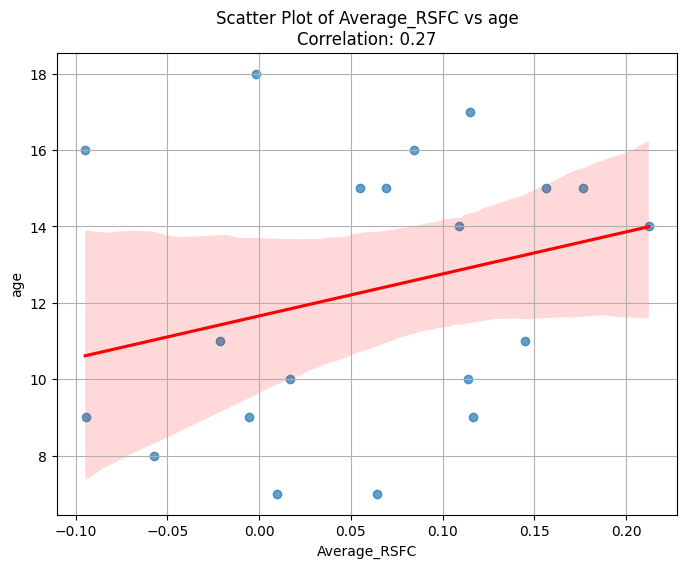

Processing: Average_RSFC with age_seizure_onset


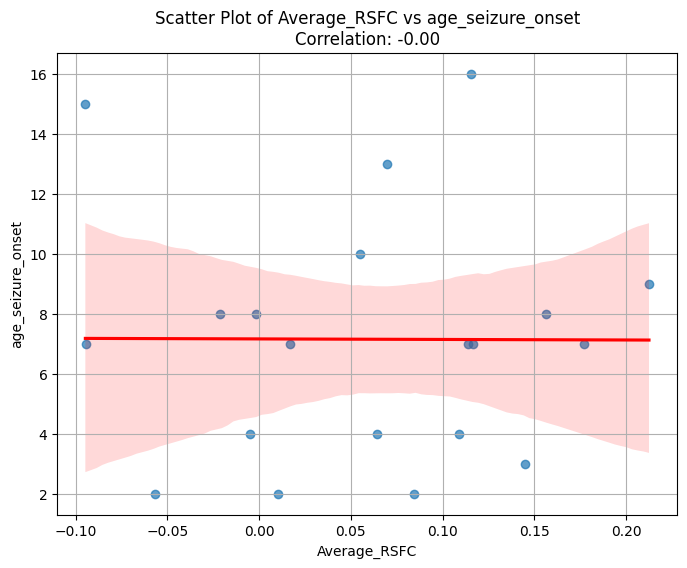

Processing: Average_RSFC with age_ep_diagnosis


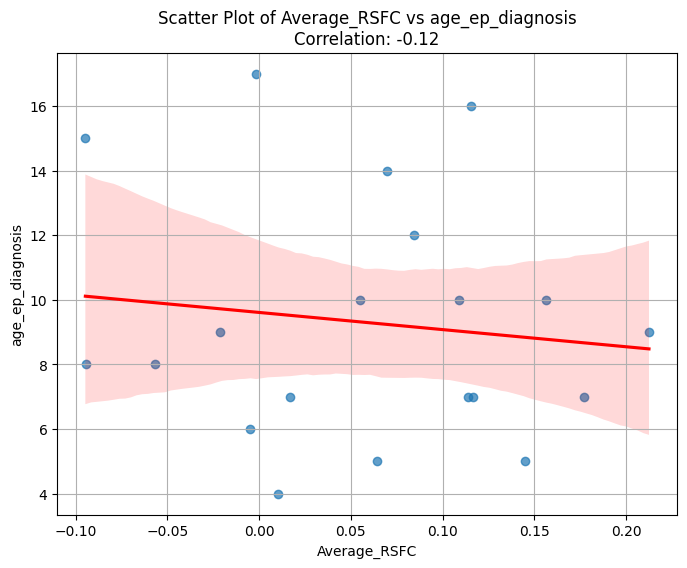

Processing: Average_RSFC with ep_duration_first_scan


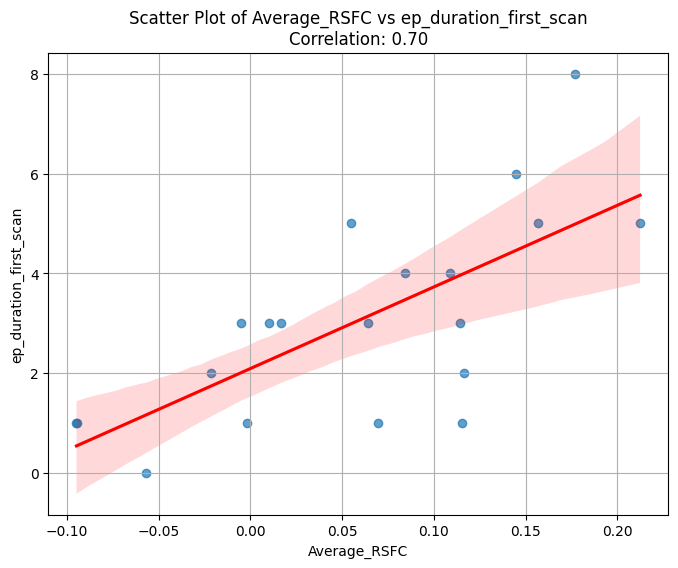

Processing: Average_RSFC with seizure_duration_first_scan


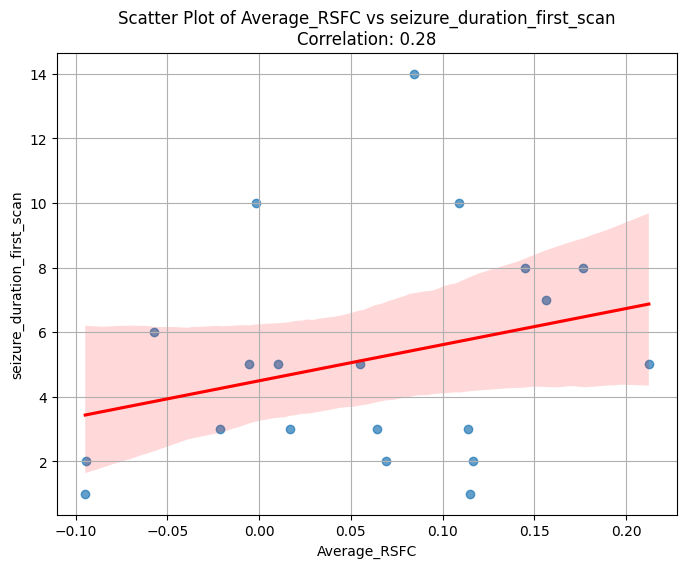

Processing: Average_RSFC with asm_first_scan


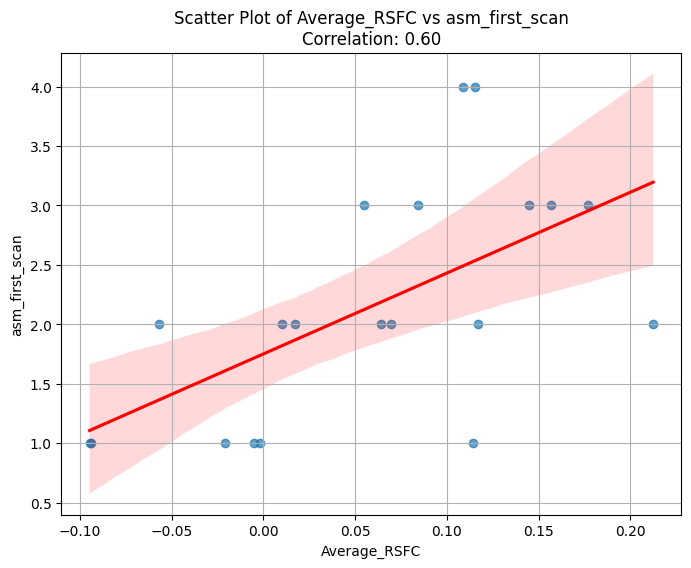

In [183]:
# Specify the list of target columns and the list of other columns
target_columns = ["Average_RSFC"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan']

# Drop rows with NaN values in the target and other columns
df_clean = df_LOBE[[*target_columns, *other_columns]].dropna()

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    if pd.api.types.is_numeric_dtype(df_clean[target_col]) and pd.api.types.is_numeric_dtype(df_clean[other_col]):
        plt.figure(figsize=(8, 6))
        
        # Create a scatter plot with a regression line
        sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate the correlation coefficient
        try:
            corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
            corr_text = f'Correlation: {corr:.2f}'
        except ValueError:
            corr_text = 'Correlation: Not computable'
        
        # Add title and labels
        plt.title(f'Scatter Plot of {target_col} vs {other_col}\n{corr_text}')
        plt.xlabel(target_col)
        plt.ylabel(other_col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping {target_col} vs {other_col} due to non-numeric data.")

# Iterate over each target column
for target_column in target_columns:
    if target_column in df_clean.columns:
        # Compute correlations and plot for each target column with all other columns
        for col in other_columns:
            if col in df_clean.columns:
                print(f"Processing: {target_column} with {col}")
                plot_scatter_with_regression(target_column, col)

In [184]:
# average over three nodes - Right side
# Specify the columns to average
columns_to_average = ["RSFC_7Networks_RH_Default_Temp_6", "RSFC_7Networks_RH_Default_Temp_2", "RSFC_7Networks_RH_Cont_Temp_1"]

# Ensure that all specified columns exist in the DataFrame
for col in columns_to_average:
    if col not in df_LOBE.columns:
        raise ValueError(f"Column {col} is not in the DataFrame")

# Calculate the average of the specified columns for each row
df_LOBE['Average_Right_RSFC'] = df_LOBE[columns_to_average].mean(axis=1)

# Display the DataFrame with the new column
print(df_LOBE)

    participant_id dataset   age  sex  age_seizure_onset  age_ep_diagnosis  \
341        sub-004    LOBE   NaN  NaN                NaN               NaN   
342        sub-006    LOBE   9.0    M                7.0               8.0   
343        sub-007    LOBE   9.0    F                7.0               7.0   
344        sub-009    LOBE   8.0    M                2.0               8.0   
345        sub-010    LOBE  15.0    M                7.0               7.0   
346        sub-012    LOBE  14.0    F                4.0              10.0   
347        sub-013    LOBE  15.0    F               13.0              14.0   
348        sub-014    LOBE  14.0    M                9.0               9.0   
349        sub-015    LOBE  10.0    M                7.0               7.0   
350        sub-017    LOBE  15.0    F               10.0              10.0   
351        sub-019    LOBE  17.0    F               16.0              16.0   
352        sub-020    LOBE  15.0    F                8.0        

/tmp/ipykernel_7073/1979454181.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LOBE['Average_Right_RSFC'] = df_LOBE[columns_to_average].mean(axis=1)


Processing: Average_Right_RSFC with age


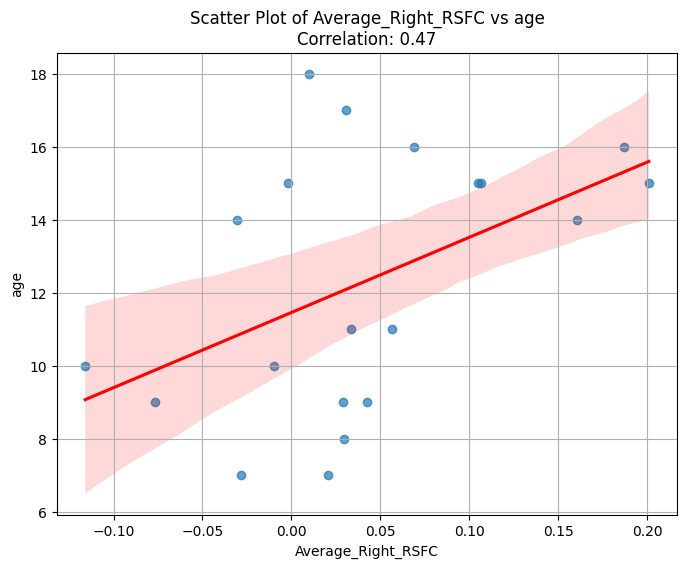

Processing: Average_Right_RSFC with age_seizure_onset


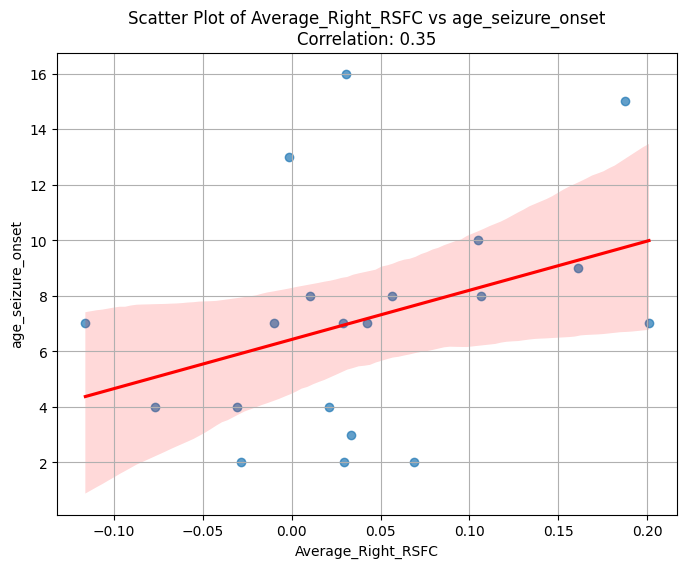

Processing: Average_Right_RSFC with age_ep_diagnosis


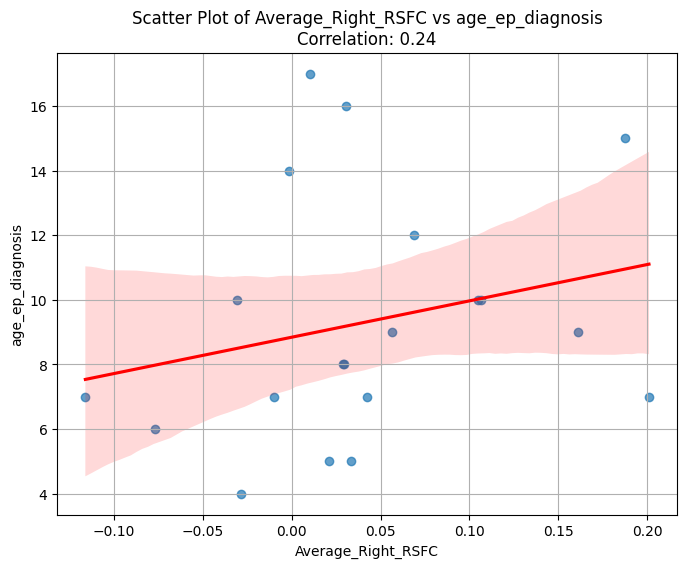

Processing: Average_Right_RSFC with ep_duration_first_scan


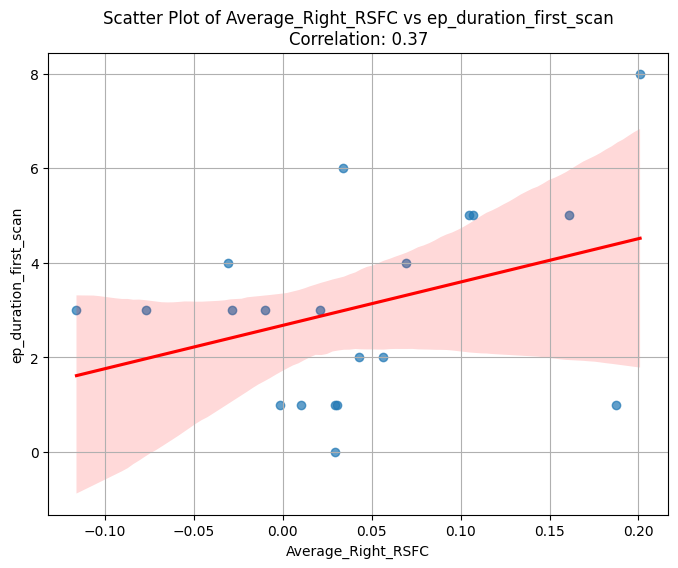

Processing: Average_Right_RSFC with seizure_duration_first_scan


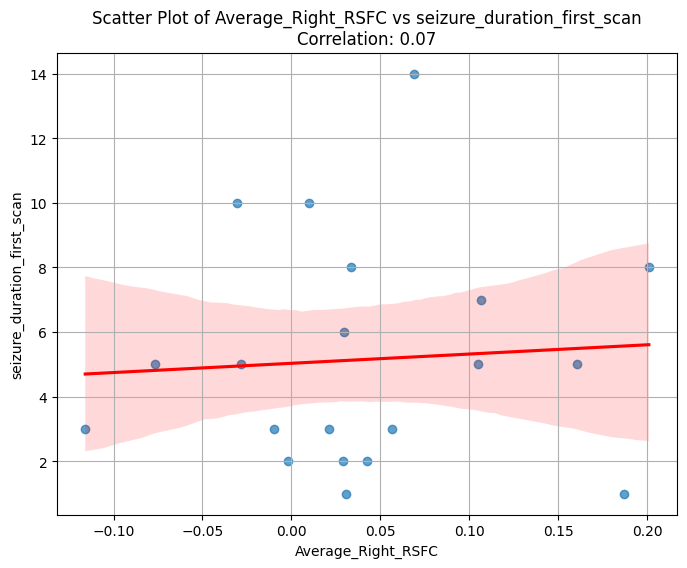

Processing: Average_Right_RSFC with asm_first_scan


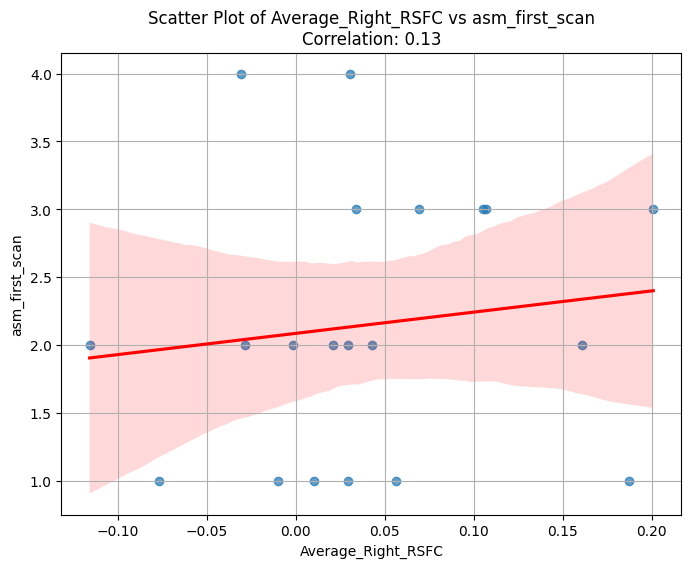

In [185]:
# Specify the list of target columns and the list of other columns
target_columns = ["Average_Right_RSFC"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan']

# Drop rows with NaN values in the target and other columns
df_clean = df_LOBE[[*target_columns, *other_columns]].dropna()

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    if pd.api.types.is_numeric_dtype(df_clean[target_col]) and pd.api.types.is_numeric_dtype(df_clean[other_col]):
        plt.figure(figsize=(8, 6))
        
        # Create a scatter plot with a regression line
        sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate the correlation coefficient
        try:
            corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
            corr_text = f'Correlation: {corr:.2f}'
        except ValueError:
            corr_text = 'Correlation: Not computable'
        
        # Add title and labels
        plt.title(f'Scatter Plot of {target_col} vs {other_col}\n{corr_text}')
        plt.xlabel(target_col)
        plt.ylabel(other_col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping {target_col} vs {other_col} due to non-numeric data.")

# Iterate over each target column
for target_column in target_columns:
    if target_column in df_clean.columns:
        # Compute correlations and plot for each target column with all other columns
        for col in other_columns:
            if col in df_clean.columns:
                print(f"Processing: {target_column} with {col}")
                plot_scatter_with_regression(target_column, col)                

In [192]:
# average over three nodes - Right side
# Specify the columns to average
columns_to_average = ["RSFC_7Networks_LH_Default_Temp_6", "RSFC_7Networks_LH_Default_Temp_2", "RSFC_7Networks_LH_Cont_Temp_1"]

# Ensure that all specified columns exist in the DataFrame
for col in columns_to_average:
    if col not in left_nobilat.columns:
        raise ValueError(f"Column {col} is not in the DataFrame")

# Calculate the average of the specified columns for each row
left_nobilat['Average_Left_RSFC'] = left_nobilat[columns_to_average].mean(axis=1)

# Display the DataFrame with the new column
print(left_nobilat)

    participant_id dataset   age sex  age_seizure_onset  age_ep_diagnosis  \
344        sub-009    LOBE   8.0   M                2.0               8.0   
346        sub-012    LOBE  14.0   F                4.0              10.0   
347        sub-013    LOBE  15.0   F               13.0              14.0   
349        sub-015    LOBE  10.0   M                7.0               7.0   
351        sub-019    LOBE  17.0   F               16.0              16.0   
354        sub-022    LOBE  11.0   F                3.0               5.0   
358        sub-027    LOBE   7.0   M                4.0               5.0   
360        sub-031    LOBE   9.0   M                4.0               6.0   

     ep_duration_first_scan  seizure_duration_first_scan  pnes  \
344                     0.0                          6.0   0.0   
346                     4.0                         10.0   0.0   
347                     1.0                          2.0   0.0   
349                     3.0               

/tmp/ipykernel_7073/4116834977.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_nobilat['Average_Left_RSFC'] = left_nobilat[columns_to_average].mean(axis=1)


Processing: Average_Right_RSFC with age


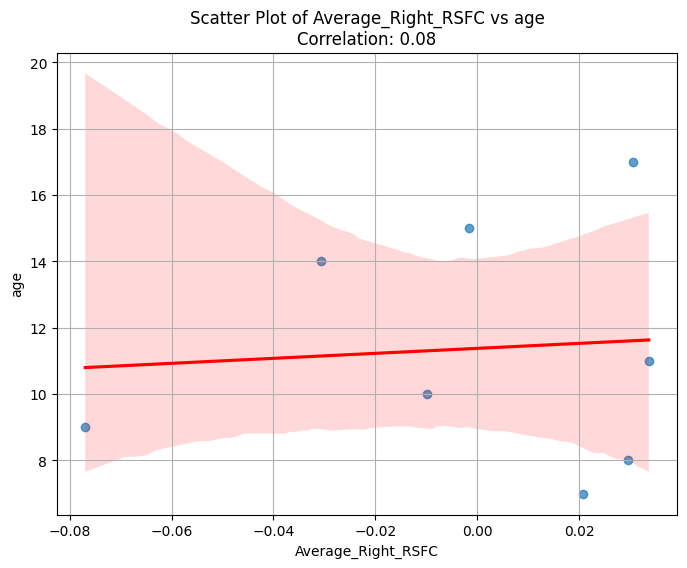

Processing: Average_Right_RSFC with age_seizure_onset


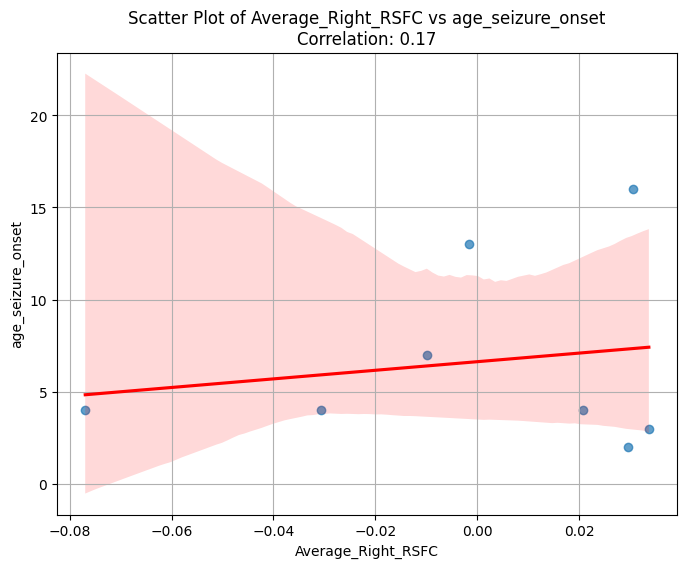

Processing: Average_Right_RSFC with age_ep_diagnosis


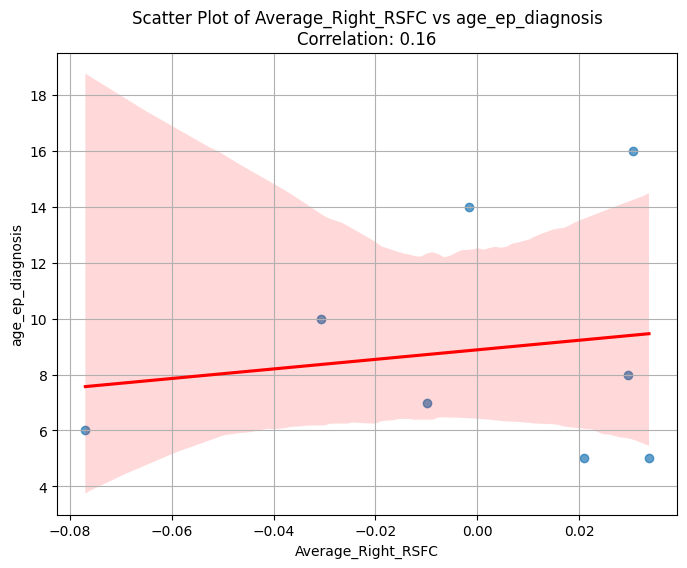

Processing: Average_Right_RSFC with ep_duration_first_scan


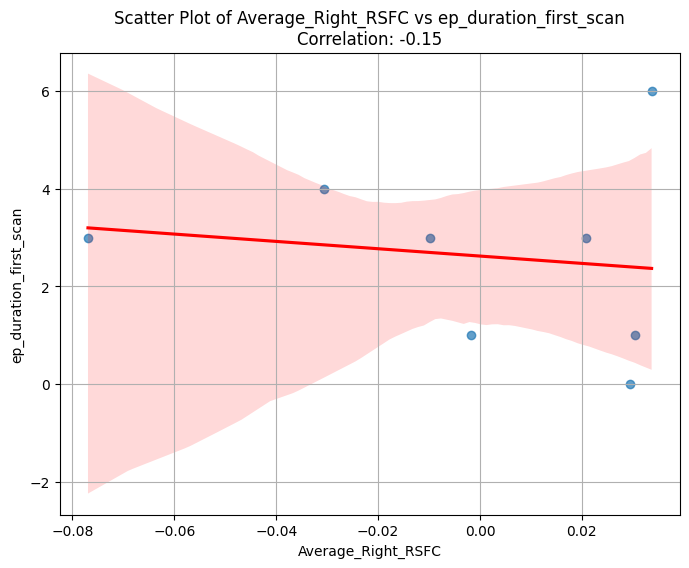

Processing: Average_Right_RSFC with seizure_duration_first_scan


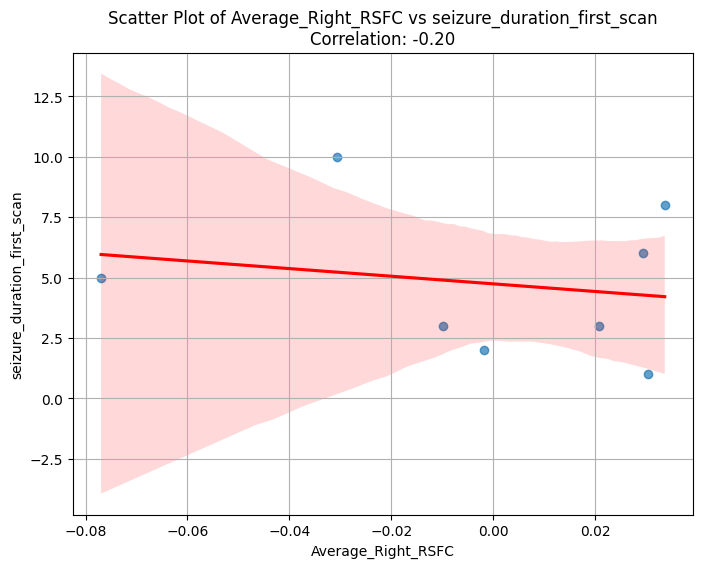

Processing: Average_Right_RSFC with asm_first_scan


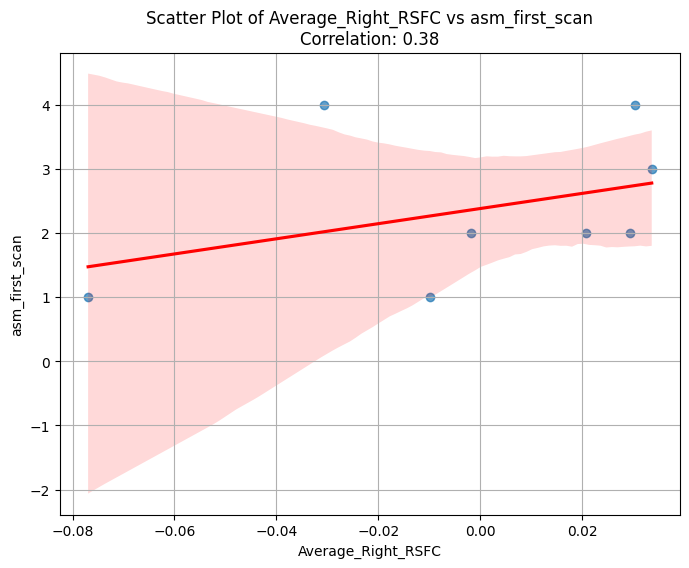

In [198]:
# Specify the list of target columns and the list of other columns
target_columns = ["Average_Right_RSFC"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan']

# Drop rows with NaN values in the target and other columns
df_clean = left_nobilat[[*target_columns, *other_columns]].dropna()

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    if pd.api.types.is_numeric_dtype(df_clean[target_col]) and pd.api.types.is_numeric_dtype(df_clean[other_col]):
        plt.figure(figsize=(8, 6))
        
        # Create a scatter plot with a regression line
        sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate the correlation coefficient
        try:
            corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
            corr_text = f'Correlation: {corr:.2f}'
        except ValueError:
            corr_text = 'Correlation: Not computable'
        
        # Add title and labels
        plt.title(f'Scatter Plot of {target_col} vs {other_col}\n{corr_text}')
        plt.xlabel(target_col)
        plt.ylabel(other_col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping {target_col} vs {other_col} due to non-numeric data.")

# Iterate over each target column
for target_column in target_columns:
    if target_column in df_clean.columns:
        # Compute correlations and plot for each target column with all other columns
        for col in other_columns:
            if col in df_clean.columns:
                print(f"Processing: {target_column} with {col}")
                plot_scatter_with_regression(target_column, col) 

In [196]:
# average over three nodes - Right side
# Specify the columns to average
columns_to_average = ["RSFC_7Networks_LH_Default_Temp_6", "RSFC_7Networks_LH_Default_Temp_2", "RSFC_7Networks_LH_Cont_Temp_1"]

# Ensure that all specified columns exist in the DataFrame
for col in columns_to_average:
    if col not in right_nobilat.columns:
        raise ValueError(f"Column {col} is not in the DataFrame")

# Calculate the average of the specified columns for each row
right_nobilat['Average_Left_RSFC'] = right_nobilat[columns_to_average].mean(axis=1)

# Display the DataFrame with the new column
print(right_nobilat)

    participant_id dataset   age sex  age_seizure_onset  age_ep_diagnosis  \
342        sub-006    LOBE   9.0   M                7.0               8.0   
345        sub-010    LOBE  15.0   M                7.0               7.0   
348        sub-014    LOBE  14.0   M                9.0               9.0   
350        sub-017    LOBE  15.0   F               10.0              10.0   
352        sub-020    LOBE  15.0   F                8.0              10.0   
356        sub-025    LOBE  18.0   F                8.0              17.0   
359        sub-029    LOBE  16.0   M               15.0              15.0   
362        sub-035    LOBE   7.0   M                2.0               4.0   
363        sub-038    LOBE  10.0   F                7.0               7.0   

     ep_duration_first_scan  seizure_duration_first_scan  pnes  \
342                     1.0                          2.0   0.0   
345                     8.0                          8.0   0.0   
348                     5.0    

/tmp/ipykernel_7073/3340668041.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_nobilat['Average_Left_RSFC'] = right_nobilat[columns_to_average].mean(axis=1)


Processing: Average_Left_RSFC with age


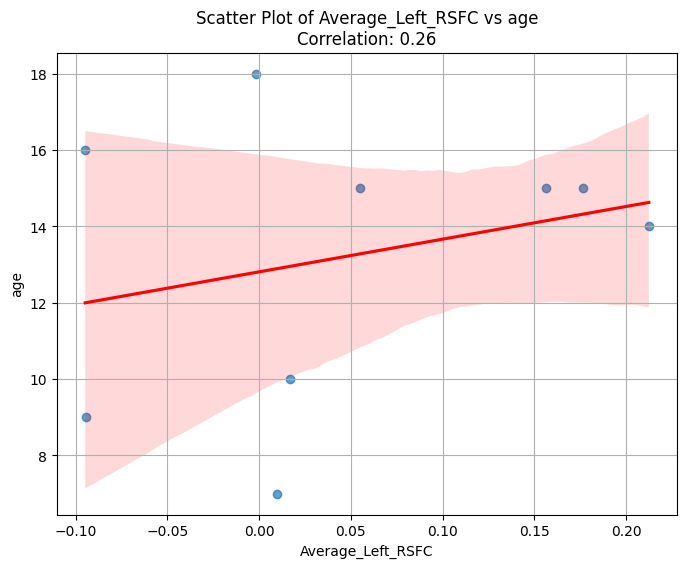

Processing: Average_Left_RSFC with age_seizure_onset


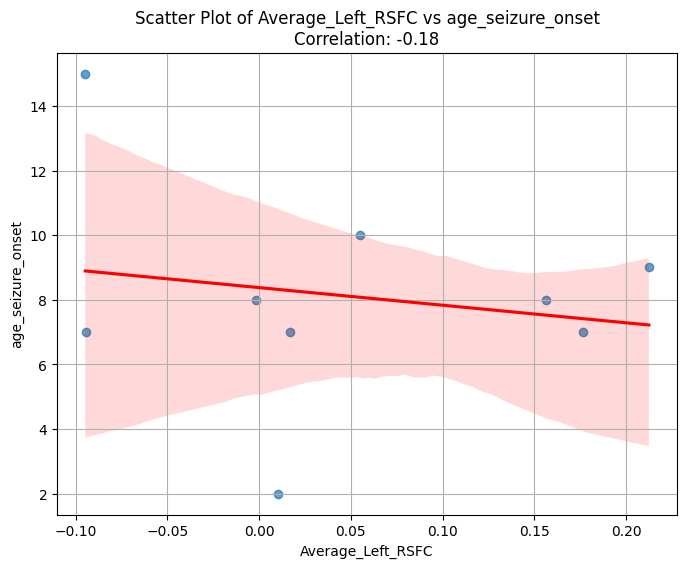

Processing: Average_Left_RSFC with age_ep_diagnosis


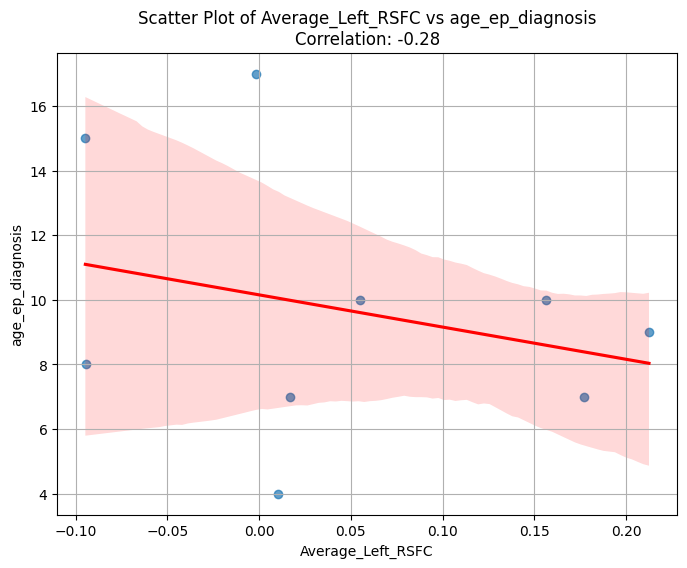

Processing: Average_Left_RSFC with ep_duration_first_scan


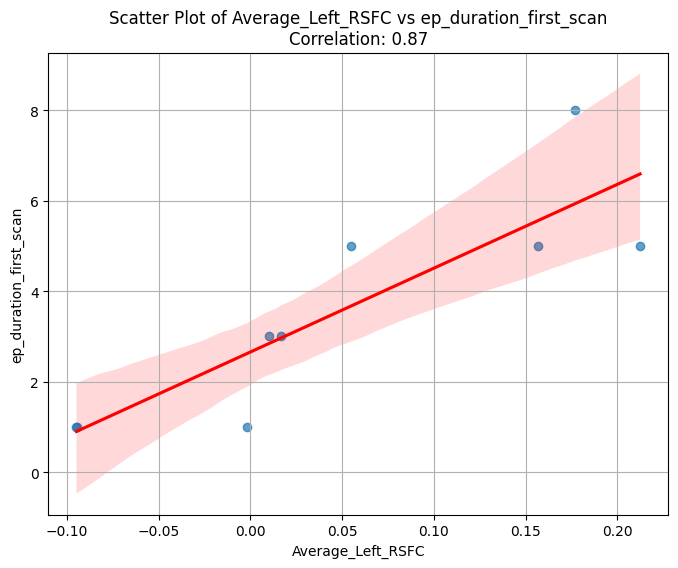

Processing: Average_Left_RSFC with seizure_duration_first_scan


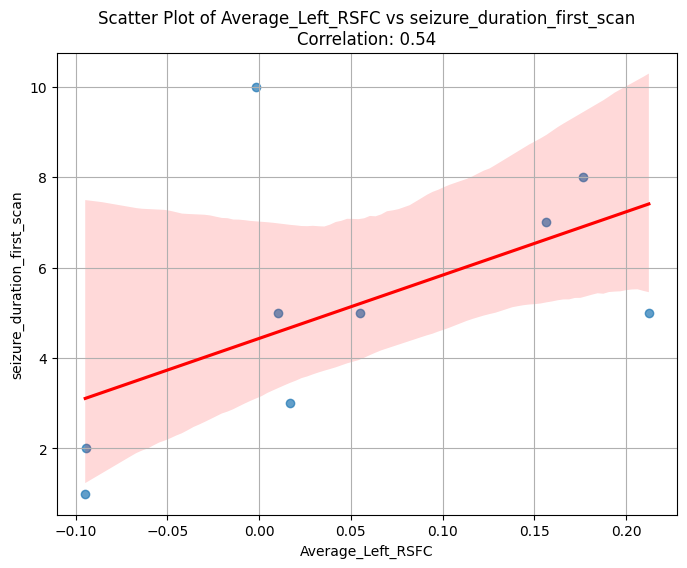

Processing: Average_Left_RSFC with asm_first_scan


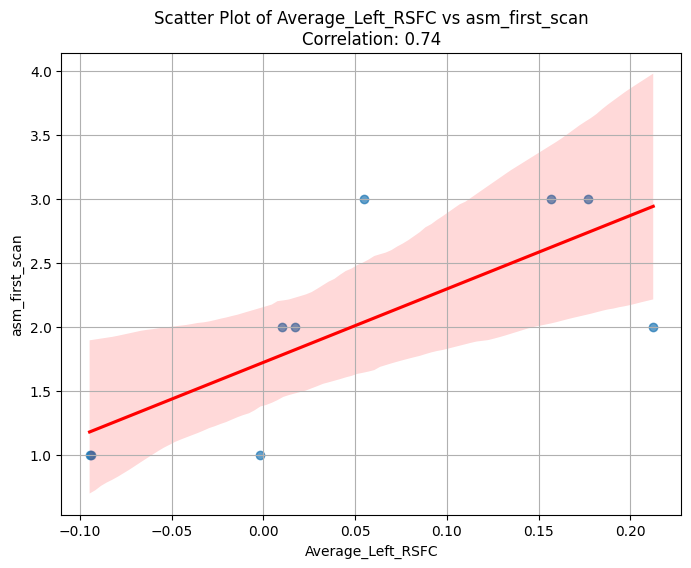

In [197]:
# Specify the list of target columns and the list of other columns
target_columns = ["Average_Left_RSFC"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan']

# Drop rows with NaN values in the target and other columns
df_clean = right_nobilat[[*target_columns, *other_columns]].dropna()

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    if pd.api.types.is_numeric_dtype(df_clean[target_col]) and pd.api.types.is_numeric_dtype(df_clean[other_col]):
        plt.figure(figsize=(8, 6))
        
        # Create a scatter plot with a regression line
        sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate the correlation coefficient
        try:
            corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
            corr_text = f'Correlation: {corr:.2f}'
        except ValueError:
            corr_text = 'Correlation: Not computable'
        
        # Add title and labels
        plt.title(f'Scatter Plot of {target_col} vs {other_col}\n{corr_text}')
        plt.xlabel(target_col)
        plt.ylabel(other_col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping {target_col} vs {other_col} due to non-numeric data.")

# Iterate over each target column
for target_column in target_columns:
    if target_column in df_clean.columns:
        # Compute correlations and plot for each target column with all other columns
        for col in other_columns:
            if col in df_clean.columns:
                print(f"Processing: {target_column} with {col}")
                plot_scatter_with_regression(target_column, col) 

In [172]:
# Specify the column to correlate with and the list of other columns

target_column = ["RSC_7Networks_LH_Cont_Temp_1", "RSFC_7Networks_LH_Cont_Temp_1"]
other_columns = ['age', 'age_seizure_onset', 'age_ep_diagnosis', 'ep_duration_first_scan', 'seizure_duration_first_scan', 'asm_first_scan'] 

df_clean = df_LOBE[[*target_columns, *other_columns]].dropna()

# Create an empty dictionary to store correlations
correlation_dict = {}

# Compute correlations with the target column
for col in other_columns:
    if col in df_clean.columns and df_clean[target_column].dtype in [float, int] and df_clean[col].dtype in [float, int]:
        correlation = df_clean[target_column].corr(df_clean[col])
        correlation_dict[col] = correlation

# Print all correlations
for col, corr in correlation_dict.items():
    print(f'Correlation between {target_column} and {col}: {corr}')

Correlation between RSC_7Networks_LH_Cont_Temp_1 and age: -0.2447078953837389
Correlation between RSC_7Networks_LH_Cont_Temp_1 and age_seizure_onset: -0.18763199176471954
Correlation between RSC_7Networks_LH_Cont_Temp_1 and age_ep_diagnosis: -0.32213288152680797
Correlation between RSC_7Networks_LH_Cont_Temp_1 and ep_duration_first_scan: 0.15001703751966408
Correlation between RSC_7Networks_LH_Cont_Temp_1 and seizure_duration_first_scan: -0.029699780980476934
Correlation between RSC_7Networks_LH_Cont_Temp_1 and asm_first_scan: -0.1202136456789068


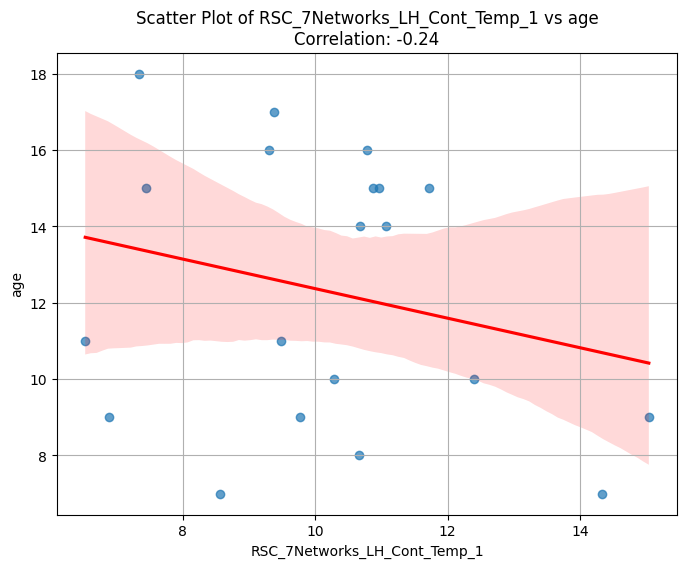

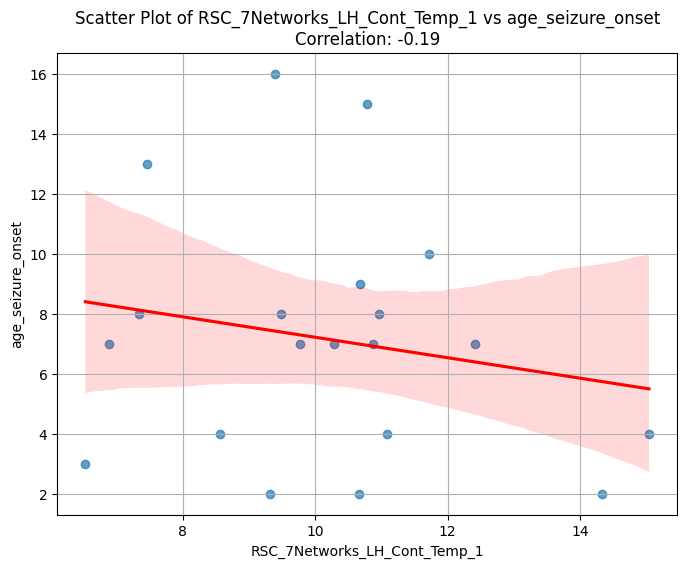

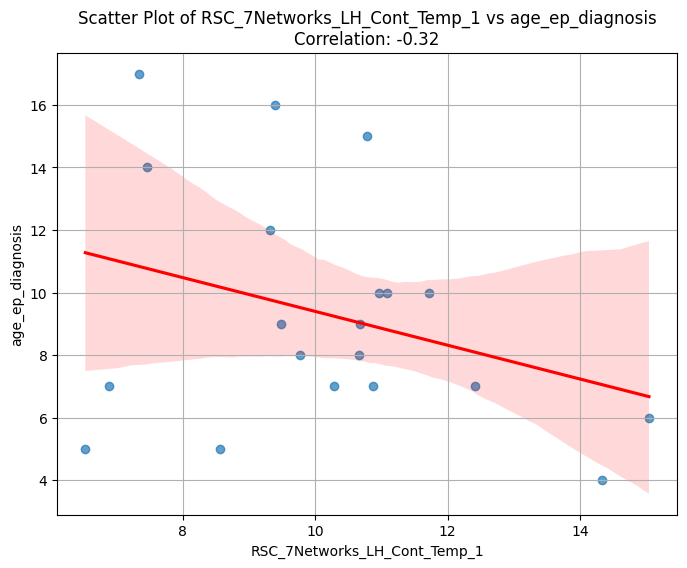

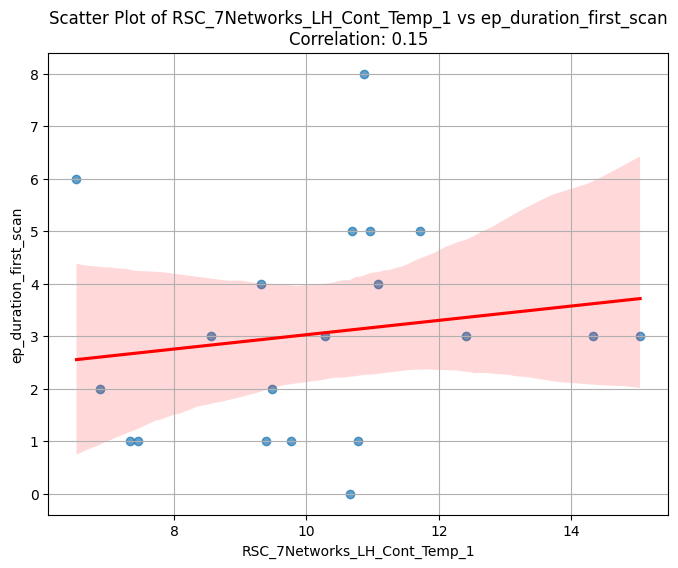

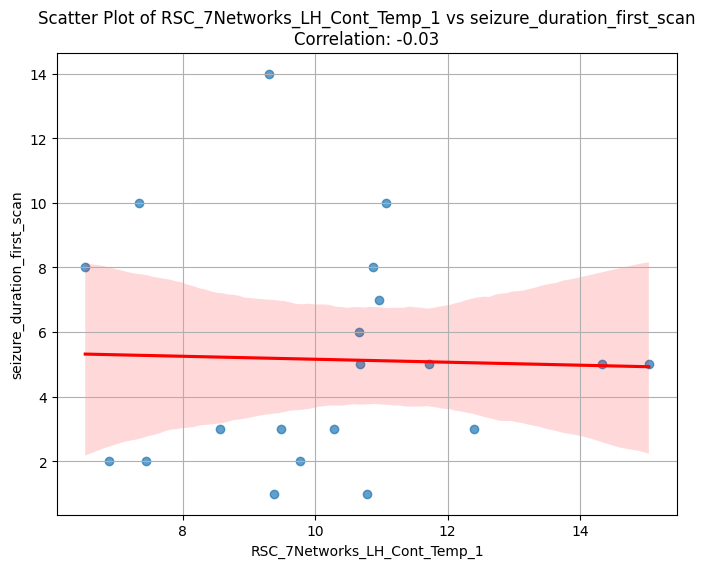

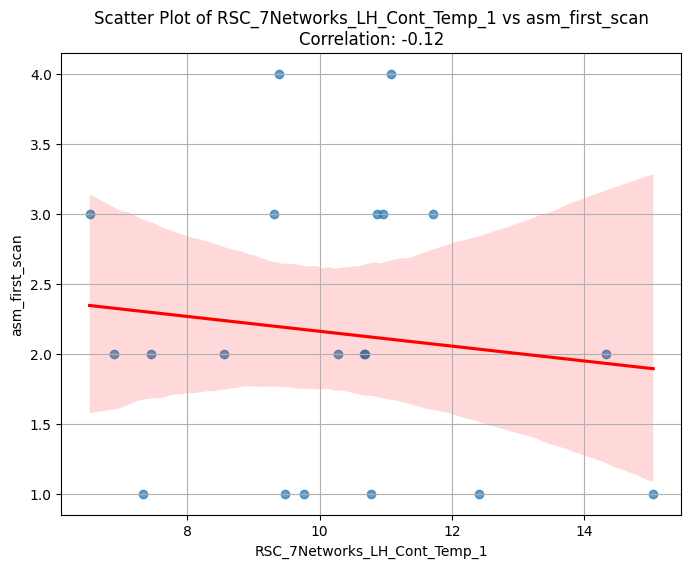

In [173]:
from scipy.stats import pearsonr


# Specify the list of columns you want to correlate
selected_columns = other_columns  # Replace with your actual column names

# Function to plot scatter plots with regression line and correlation coefficient
def plot_scatter_with_regression(target_col, other_col):
    plt.figure(figsize=(8, 6))
    
    # Create a scatter plot with a regression line
    sns.regplot(x=target_col, y=other_col, data=df_clean, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
    
    # Calculate the correlation coefficient
    corr, _ = pearsonr(df_clean[target_col], df_clean[other_col])
    
    # Add title and labels
    plt.title(f'Scatter Plot of {target_col} vs {other_col}\nCorrelation: {corr:.2f}')
    plt.xlabel(target_col)
    plt.ylabel(other_col)
    plt.grid(True)
    plt.show()

# Plot scatter plots for the target column with each of the other columns
for col in other_columns:
    if col in df_clean.columns and target_column in df_clean.columns:
        plot_scatter_with_regression(target_column, col)

In [209]:
from scipy.io import loadmat
mat_data = loadmat('/home/ROBARTS/mtaylor/graham/projects/ctb-akhanf-ab/cfmm-bids/Khan/LOBE/analysis/LOBE_analysis/NBS/results/NBS_results_SC_group_threshold3_5000.mat')

In [208]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'nbs'])


In [212]:
# Access a specific variable
variable_name = 'nbs'  
data = mat_data[variable_name]

stats = data['test_stat]
    
# Preview the first few elements of the data
#print("Preview of data:")
#print(data[:5])  # Adjust the slice as needed

# Print the shape and type of the data
#print(type(data))
#print(data.shape if hasattr(data, 'shape') else 'No shape attribute')
#print(data)

KeyError: 'test_stat'

In [213]:
import pandas as pd

# Convert to DataFrame if the data is in a 2D array or similar structure
if isinstance(data, (list, pd.DataFrame)):
    df = pd.DataFrame(data)
    print(df.head())  # Preview the first few rows
else:
    print("Data is not in a format that can be easily converted to DataFrame")

Data is not in a format that can be easily converted to DataFrame
